In [1]:
# 导入数据处理相关的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 导入Sklearn相关的库和模块
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import DataConversionWarning
from sklearn.utils import shuffle

# 导入其他工具
import joblib
import warnings

# 忽略特定类型的警告
warnings.filterwarnings("ignore", category=DataConversionWarning)

###########修改字体
from matplotlib import font_manager
# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]

if t_nr_path:
    # 如果找到了Times New Roman字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
else:
    # 如果没有找到，使用另一种可用的衬线字体
    plt.rcParams['font.family'] = 'serif'

In [2]:
from matplotlib import font_manager, pyplot as plt

# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称，并确保字体能支持加粗
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f and 'Bold' in f]

if t_nr_path:
    # 如果找到了Times New Roman Bold字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
    plt.rcParams['font.weight'] = 'bold'  # 设置字体为加粗
else:
    # 如果没有找到加粗的Times New Roman，尝试设置为普通的Times New Roman并加粗
    t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]
    if t_nr_path:
        prop = font_manager.FontProperties(fname=t_nr_path[0])
        plt.rcParams['font.family'] = prop.get_name()
        plt.rcParams['font.weight'] = 'bold'
    else:
        # 如果没有找到Times New Roman，使用默认的衬线字体并设置为加粗
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.weight'] = 'bold'

In [4]:
import os
os.chdir("D:/Issue/2024_2025/夏雨婷文章/md05/xyt/md04/3-参数搜索-分子指纹")

In [7]:
# 导入Pandas库用于数据处理（前面已经导入）
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# 读取训练集数据
data = pd.read_csv('./results/version-3/MGAM-train-APfps.csv')
# 读取测试集数据
data2 = pd.read_csv('./results/version-3/MGAM-test-APfps.csv')

# 从训练数据中分离出特征（从第三列开始的所有列）
x_mor_train = data.iloc[:,2:]  # Python中索引从0开始，所以这里是第三列及之后的所有列
# 从训练数据中分离出标签（第二列）
y_mor_train = data.iloc[:,1:2] # 这里使用1:2是为了获取DataFrame格式的输出，而不是Series

# 从测试数据中分离出特征（同样是从第三列开始的所有列）
x_mor_test = data2.iloc[:,2:]
# 从测试数据中分离出标签（第二列）
y_mor_test = data2.iloc[:,1:2]

# 将分离出的训练数据特征和标签分别赋值给X和Y变量
X = x_mor_train # 输入特征
Y = y_mor_train # 对应的目标变量（标签）

# 设置变量存储ECFPs列名，此处似乎没有在后续代码中使用
columns = "APfps"

# 初始化StratifiedKFold，进行分层K折交叉验证的设置
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)    
# n_splits=5 表示将数据分为5折
# shuffle=True 表示在每次分割前都会对数据进行随机洗牌，以确保数据的随机性
# random_state=0 设置随机种子，确保每次程序执行时划分的结果一致，提高结果的可重复性

### AdaBoost参数搜索

In [9]:
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier

# 设置AdaBoost分类器的n_estimators参数的搜索范围
n_estimators_range = [int(x) for x in np.linspace(start=10, stop=510, num=100)]

# 定义函数来训练AdaBoost模型，并进行网格搜索寻找最佳参数
def AdaBoostClassifier_model(X, Y):
    # 实例化AdaBoost分类器
    AdaBoostClassifier_auto = AdaBoostClassifier(random_state=0)
    
    # 定义参数网格（修复learning_rate范围，移除无效值）
    param_dict = { 
        "n_estimators": n_estimators_range,
        # 学习率必须 > 0，移除0值
        "learning_rate": [0.1, 0.5, 1, 1.5, 2],  
        # 移除已弃用的algorithm参数（可选）
    }
    
    # 实例化GridSearchCV
    estimator = GridSearchCV(
        estimator=AdaBoostClassifier_auto, 
        param_grid=param_dict, 
        cv=cv, 
        n_jobs=-1, 
        scoring="roc_auc"
    )
    
    # 训练模型
    estimator.fit(X, Y)
    
    # 返回最佳参数、最佳分数和最佳模型
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

# 调用函数，训练模型，并打印最佳参数和分数
tmp_1, tmp_2, AdaBoostClassifier_auto = AdaBoostClassifier_model(X, Y)
print(tmp_1, tmp_2, AdaBoostClassifier_auto)

{'learning_rate': 1, 'n_estimators': 494} 0.9579590889677376 AdaBoostClassifier(learning_rate=1, n_estimators=494, random_state=0)


In [ ]:
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier

# 设置AdaBoost分类器的n_estimators参数的搜索范围
n_estimators_range=[int(x) for x in np.linspace(start=10,stop=510,num=100)]

# 定义函数来训练AdaBoost模型，并进行网格搜索寻找最佳参数
def AdaBoostClassifier_model(X,Y):
    # 实例化AdaBoost分类器
    AdaBoostClassifier_auto = AdaBoostClassifier(random_state=0)
    # 定义参数网格
    param_dict = { 
        "n_estimators":n_estimators_range,
        "learning_rate":[0, 0.5, 1, 1.5, 2],
        "algorithm":['SAMME', 'SAMME.R']
    }
    # 实例化GridSearchCV，使用roc_auc作为评分标准
    estimator = GridSearchCV(estimator = AdaBoostClassifier_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring = "roc_auc")
    # 训练模型
    estimator.fit(X,Y)
    # 返回最佳参数、最佳分数和最佳模型
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

# 调用函数，训练模型，并打印最佳参数和分数
tmp_1, tmp_2, AdaBoostClassifier_auto = AdaBoostClassifier_model(X,Y)
print(tmp_1, tmp_2, AdaBoostClassifier_auto)

#### 最优参数的混淆矩阵

In [32]:
print(tmp_1, tmp_2, AdaBoostClassifier_auto)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 494} 0.9579590889677376 AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=494,
                   random_state=0)


训练集准确度是0.9751082251082251
测试集准确度是0.9090909090909091


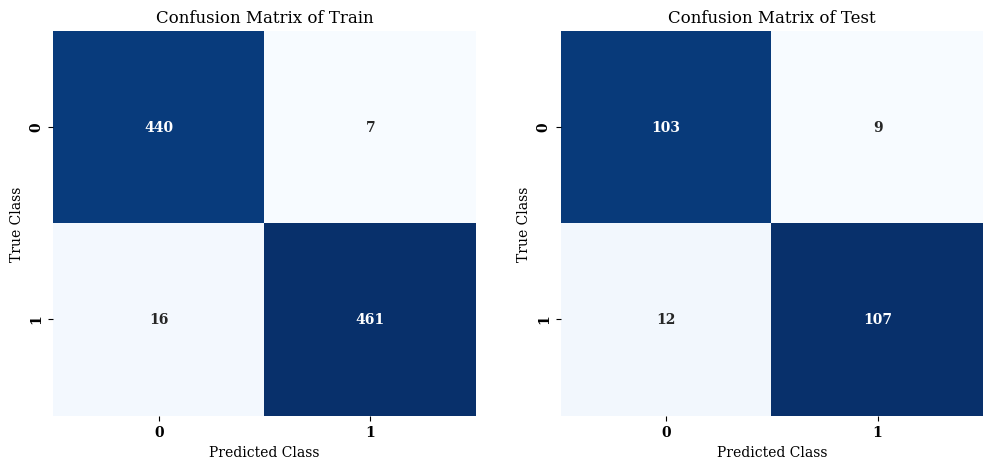

In [ ]:
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier

# 设置训练集和测试集的特征和标签
train_X = x_mor_train
train_Y = y_mor_train
test_X = x_mor_test
test_Y = y_mor_test

# 使用找到的最佳参数实例化AdaBoost分类器
Ada = AdaBoostClassifier(random_state = 0,
                         algorithm = 'SAMME',
                         learning_rate = 1,
                         n_estimators = 494)

# 训练模型
estimator = Ada
estimator.fit(train_X, train_Y)
# 预测训练集和测试集
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)
# 打印训练集和测试集的准确率
print(f"训练集准确度是{accuracy_score(train_Y, clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y, clf_test)}")

# 计算训练集和测试集的混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)

# 绘制训练集和测试集的混淆矩阵热图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)  #创建了一个包含两个子图的图形，排列方式为一行两列
sns.heatmap(train_matrix, annot=True, cmap="Blues", 
            cbar=None, fmt="d")  #cbar=None 就会不显示色条,fmt="d"确保中间现实数字
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", 
            cbar=None, fmt="d")  #cbar=None 就会不显示色条,fmt="d"确保中间现实数字
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")
#plt.savefig("./APfps/Ada-APfps/混淆矩阵_Ada.svg", dpi = 600)
plt.show()

#### ROC曲线部分

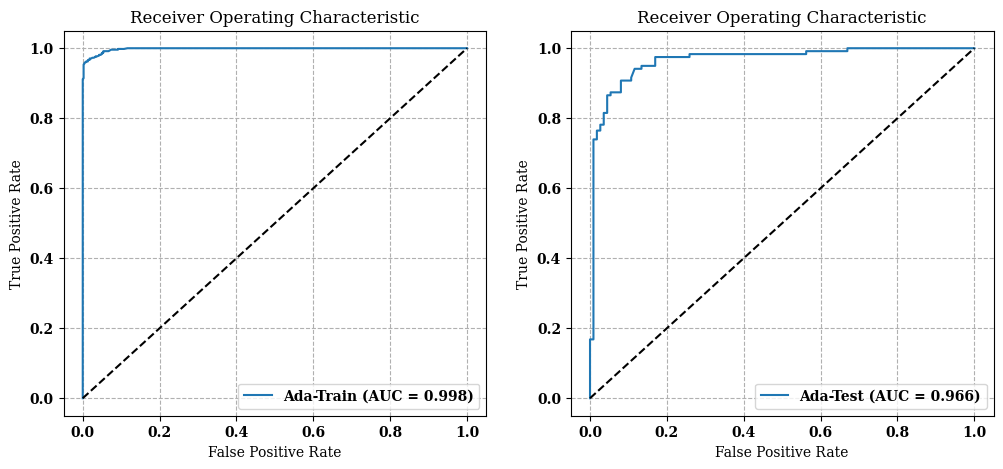

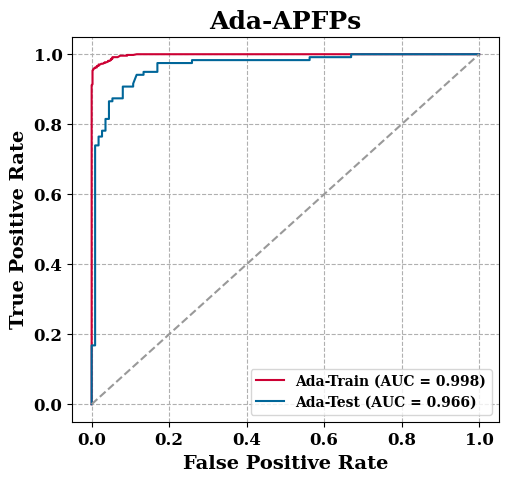

In [6]:
# 绘制ROC曲线，前面已经导入相关包
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# 设置图形大小
plt.figure(figsize=(12, 5))

# 创建第一个子图，用于绘制训练集的ROC曲线
plt.subplot(1, 2, 1)
# 通过模型的predict_proba方法获取训练集上的预测概率，绘制训练集ROC图
y_pro_train = estimator.predict_proba(train_X)[:, 1]
#计算训练集的真阳性率（TPR）和假阳性率（FPR）
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train)
# 计算AUC值
roc_auc_train = auc(fpr_train, tpr_train) # 也可以使用roc_auc_score(y_test, y_pro)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic') # 设置标题
plt.plot(fpr_train, tpr_train, label='Ada-Train (AUC = %0.3f)' % roc_auc_train) # 训练集ROC曲线
plt.plot([0, 1], [0, 1], '--',  color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 创建第二个子图，用于绘制测试集的ROC曲线
plt.subplot(1, 2, 2)
# 通过模型的predict_proba方法获取测试集上的预测概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 计算测试集的真阳性率（TPR）和假阳性率（FPR）
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)
# 计算AUC值
roc_auc_test = auc(fpr_test, tpr_test)  #也可以使用roc_auc_score(y_test, y_pro)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='Ada-Test (AUC = %0.3f)' % roc_auc_test) # 测试集ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/Ada-APfps/ROC_Ada.svg", dpi = 600)  # 保存图形为 SVG 格式文件
plt.show() # 显示图形


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='Ada-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='Ada-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('Ada-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/Ada-APfps/ROC_Ada_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### PR_AUC曲线部分

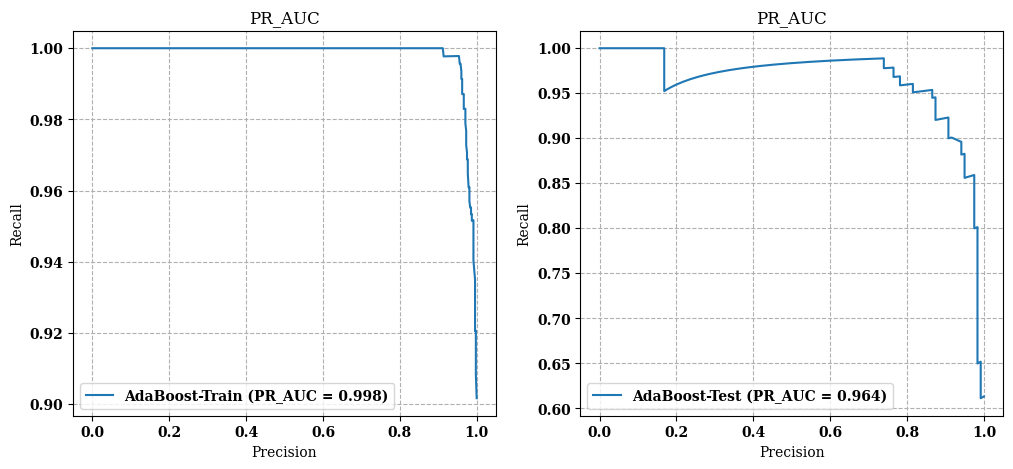

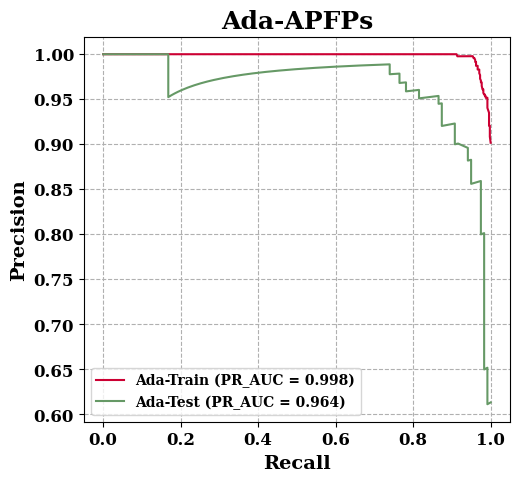

In [7]:
# 绘制PR（Precision-Recall）曲线
import matplotlib.pyplot as plt # 确保导入了matplotlib.pyplot
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import warnings
warnings.filterwarnings("ignore")

# 设置绘图的大小
fig = plt.figure(figsize=(12, 5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 通过模型预测训练集上的概率
y_pro_train = estimator.predict_proba(train_X)[:, 1]
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='AdaBoost-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 通过模型预测测试集上的概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='AdaBoost-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left')  # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/Ada-APfps/PR_Ada.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='Ada-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='Ada-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('Ada-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例位置
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/Ada-APfps/PR_Ada_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标的计算

In [16]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/Ada-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = Ada
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

KeyboardInterrupt: 

In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/Ada-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = Ada
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import average_precision_score

estimator = Ada
estimator.fit(train_X, train_Y)
clf_test = estimator.predict(test_X)
acc_test = accuracy_score(test_Y,clf_test)
roc_test = roc_auc_score(test_Y,clf_test)
pre_test = precision_score(test_Y,clf_test)
rec_test = recall_score(test_Y,clf_test)
f1_test = f1_score(test_Y,clf_test)
mcc_test = matthews_corrcoef(test_Y,clf_test)
matrix_test = confusion_matrix(test_Y,clf_test)
ap_test = average_precision_score(test_Y,clf_test)

algorithm_model = [Ada]
algorithm_name = ["AdaBoost"]
tmp_1 = np.zeros((1,2))
Auc_data = pd.DataFrame(tmp_1,index=algorithm_name,columns=range(2))
tmp_2 = np.zeros((1,2))
Acc_data = pd.DataFrame(tmp_2,index=algorithm_name,columns=range(2))
tmp_3 = np.zeros((1,2))
Recall_data = pd.DataFrame(tmp_3,index=algorithm_name,columns=range(2))  
tmp_4 = np.zeros((1,2))
Precision_data = pd.DataFrame(tmp_4,index=algorithm_name,columns=range(2)) 
tmp_5 = np.zeros((1,2))
F1_data = pd.DataFrame(tmp_5,index=algorithm_name,columns=range(2))
tmp_6 = np.zeros((1,2))
MCC_data = pd.DataFrame(tmp_6,index=algorithm_name,columns=range(2))
tmp_7 = np.zeros((1,2))
Ap_data = pd.DataFrame(tmp_7,index=algorithm_name,columns=range(2))

Auc_data.loc[algorithm_name]  = roc_test
Acc_data.loc[algorithm_name]  = acc_test
# Recall_data.loc[algorithm_name] = rec_test
Precision_data.loc[algorithm_name] = pre_test
F1_data.loc[algorithm_name]  = f1_test
MCC_data.loc[algorithm_name]  = mcc_test
Ap_data.loc[algorithm_name]  = ap_test

Auc_data.to_csv("test_ROC.csv")
Acc_data.to_csv("test_ACC.csv")
Recall_data.to_csv("test_REC.csv")
Precision_data.to_csv("test_PRE.csv")
F1_data.to_csv("test_F1.csv")
MCC_data.to_csv("test_MCC.csv")
Ap_data.to_csv("test_AP.csv")

clf_train = estimator.predict(train_X)
acc_train = accuracy_score(train_Y,clf_train)
roc_train = roc_auc_score(train_Y,clf_train)
pre_train = precision_score(train_Y,clf_train)
rec_train = recall_score(train_Y,clf_train)
f1_train = f1_score(train_Y,clf_train)
mcc_train = matthews_corrcoef(train_Y,clf_train)
matrix_train = confusion_matrix(train_Y,clf_train)
ap_train = average_precision_score(train_Y,clf_train)

tmp_1 = np.zeros((1,2))
Auc_data = pd.DataFrame(tmp_1,index=algorithm_name,columns=range(2))
tmp_2 = np.zeros((1,2))
Acc_data = pd.DataFrame(tmp_2,index=algorithm_name,columns=range(2))
tmp_3 = np.zeros((1,2))
Recall_data = pd.DataFrame(tmp_3,index=algorithm_name,columns=range(2))  
tmp_4 = np.zeros((1,2))
Precision_data = pd.DataFrame(tmp_4,index=algorithm_name,columns=range(2)) 
tmp_5 = np.zeros((1,2))
F1_data = pd.DataFrame(tmp_5,index=algorithm_name,columns=range(2))
tmp_6 = np.zeros((1,2))
MCC_data = pd.DataFrame(tmp_6,index=algorithm_name,columns=range(2))
tmp_7 = np.zeros((1,2))
Ap_data = pd.DataFrame(tmp_7,index=algorithm_name,columns=range(2))

Auc_data.loc[algorithm_name]  = roc_train
Acc_data.loc[algorithm_name]  = acc_train
Recall_data.loc[algorithm_name] = rec_train
Precision_data.loc[algorithm_name] = pre_train
F1_data.loc[algorithm_name]  = f1_train
MCC_data.loc[algorithm_name]  = mcc_train
Ap_data.loc[algorithm_name]  = ap_train

Auc_data.to_csv("train_ROC.csv")
Acc_data.to_csv("train_ACC.csv")
Recall_data.to_csv("train_REC.csv")
Precision_data.to_csv("train_PRE.csv")
F1_data.to_csv("train_F1.csv")
MCC_data.to_csv("train_MCC.csv")
Ap_data.to_csv("train_AP.csv")

### 决策树分类器（DecisionTreeClassifier）参数搜索

In [3]:
# 导入决策树分类器
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

# 设置决策树参数max_depth的搜索范围
max_depth_range=[int(x) for x in np.linspace(5, 20, num=5)]
# 设置决策树参数min_samples_split的搜索范围
min_samples_split_range=[int(x) for x in np.linspace(5, 25, num=5)]
# 设置决策树参数min_samples_leaf的搜索范围
min_samples_leaf_range=[3, 4, 5, 6, 7]

# 定义一个函数用于训练决策树模型并使用网格搜索找到最优参数
def DecisionTreeClassifier_model(X,Y): 
    # 实例化决策树分类器，设置随机种子以确保结果可复现
    DecisionTreeClassifier_auto = DecisionTreeClassifier(random_state=0)
    # 定义参数字典，包含需要进行搜索的参数
    param_dict = {
        'max_depth':max_depth_range,
        'min_samples_split':min_samples_split_range,
        'min_samples_leaf':min_samples_leaf_range,
    }
    # 实例化GridSearchCV，传入决策树实例、参数字典、交叉验证策略、n_jobs参数设置为-1以使用所有可用的CPU核心，使用ROC AUC作为评分标准
    estimator = GridSearchCV(estimator=DecisionTreeClassifier_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring="roc_auc")
    # 在给定的数据上训练模型
    estimator.fit(X,Y)
    # 返回最优参数、最优分数以及最优模型
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

# 调用上述定义的函数，传入特征集X和标签集Y
tmp_1, tmp_2, DecisionTreeClassifier_auto = DecisionTreeClassifier_model(X,Y)

# 打印出最优参数、最优分数和最优模型
print(tmp_1,tmp_2,DecisionTreeClassifier_auto)

{'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 5} 0.8779994989815363 DecisionTreeClassifier(max_depth=16, min_samples_leaf=6, min_samples_split=5,
                       random_state=0)


#### 模型训练与性能评估

In [8]:
# 导入决策树分类器
from sklearn.tree import DecisionTreeClassifier
# 导入性能评估指标
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# 忽略警告信息
warnings.filterwarnings("ignore")

# 定义决策树模型，并设置参数
DT = DecisionTreeClassifier(random_state=0,
                            class_weight='balanced',
                            criterion='gini',
                            max_features='sqrt',
                            splitter='best',
                            max_depth=16,
                            min_samples_leaf=6,
                            min_samples_split=5)

# 训练模型
train_X = x_mor_train
train_Y = y_mor_train
test_X = x_mor_test
test_Y = y_mor_test
estimator = DT
estimator.fit(train_X, train_Y)

# 在训练集和测试集上进行预测
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 打印训练集和测试集的准确率
print(f"训练集准确度是{accuracy_score(train_Y, clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y, clf_test)}")

训练集准确度是0.8679653679653679
测试集准确度是0.7662337662337663


#### 混淆矩阵可视化

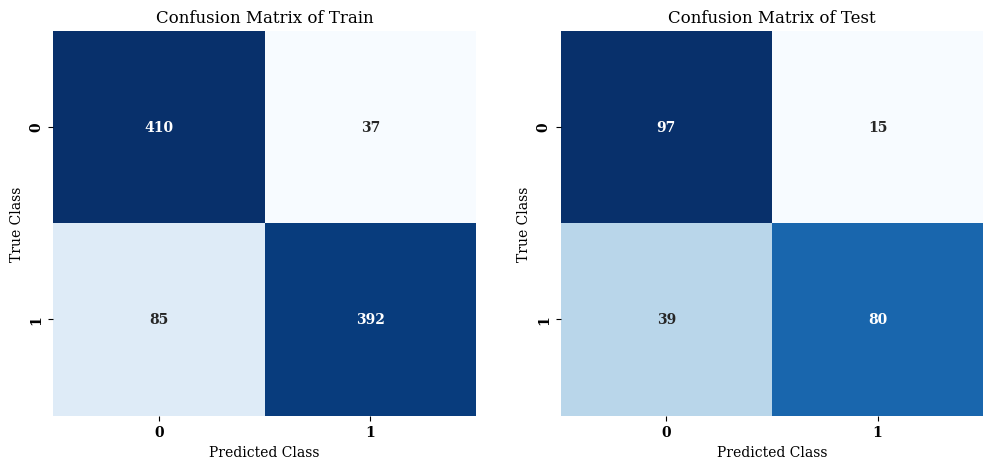

In [37]:
# 计算训练集和测试集的混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)

# 设置可视化的颜色
pall = sns.color_palette(['#73a2c6', '#f4777f'])
sns.set_palette(pall)

# 绘制训练集的混淆矩阵
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

# 绘制测试集的混淆矩阵
plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")
plt.savefig("./APfps/DT-APfps/混淆矩阵_DT.svg", dpi=600)
plt.show()

#### ROC曲线绘制

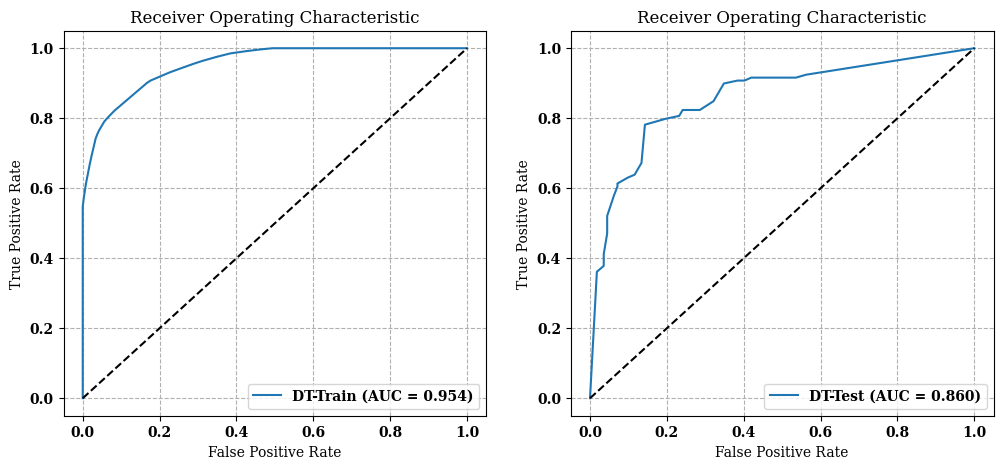

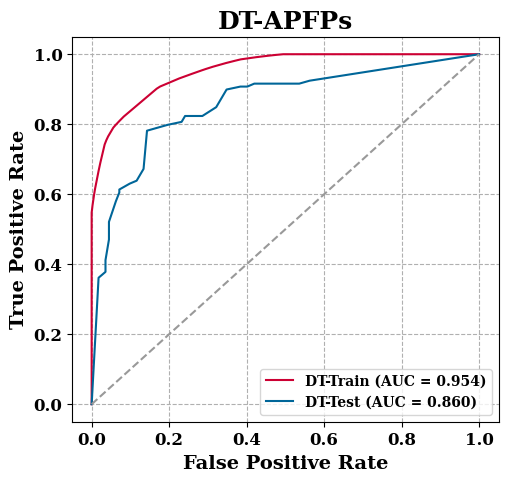

In [9]:
# 绘制训练集和测试集的ROC曲线
# 设置图形大小
plt.figure(figsize=(12, 5))

# 创建第一个子图，用于绘制训练集的ROC曲线
plt.subplot(1, 2, 1)
# 通过模型的predict_proba方法获取训练集上的预测概率，绘制训练集ROC图
y_pro_train = estimator.predict_proba(train_X)[:, 1]
#计算训练集的真阳性率（TPR）和假阳性率（FPR）
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train)
# 计算AUC值
roc_auc_train = auc(fpr_train, tpr_train)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic') # 设置标题
plt.plot(fpr_train, tpr_train, label='DT-Train (AUC = %0.3f)' % roc_auc_train) # 绘制ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 创建第二个子图，用于绘制测试集的ROC曲线
plt.subplot(1, 2, 2)
# 通过模型的predict_proba方法获取测试集上的预测概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 计算测试集的真阳性率（TPR）和假阳性率（FPR）
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)
# 计算AUC值
roc_auc_test = auc(fpr_test, tpr_test)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='DT-Test (AUC = %0.3f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], '--', color='black')
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/DT-APfps/ROC_DT.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='DT-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='DT-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('DT-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/DT-APfps/ROC_DT_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### PR_AUC曲线的绘制

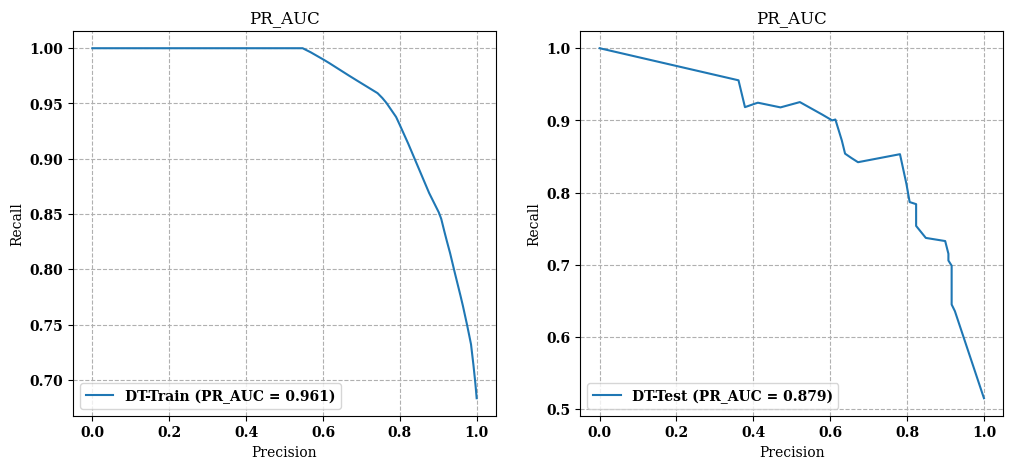

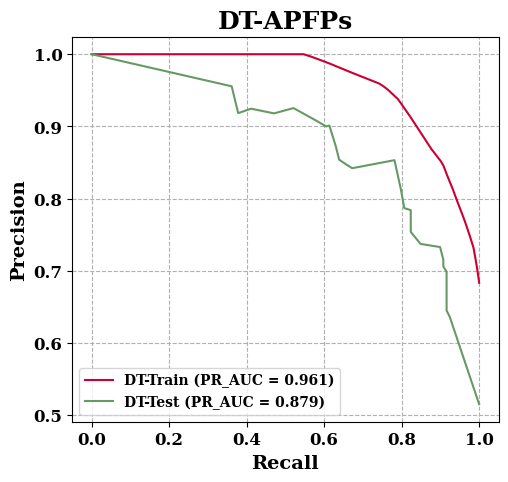

In [10]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

# 绘制PR_AUC曲线来评估模型在处理不平衡数据上的性能
# 设置绘图的大小
plt.figure(figsize=(12, 5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='DT-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='DT-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/DT-APfps/PR_DT.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='DT-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='DT-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('DT-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例位置
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/DT-APfps/PR_DT_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标的计算

In [19]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/DT-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = DT
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

### 梯度提升树(GradientBoostingClassifier, GBT)参数搜索

#### 准备阶段

In [3]:
import warnings
warnings.filterwarnings("ignore")  # 忽略警告信息
from time import time
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# 记录开始时间
begin_time = time()

# 定义超参数的搜索范围
n_estimators_range = [int(x) for x in np.linspace(start=10, stop=210, num=100)]  # 树的数量
max_depth_range = [int(x) for x in np.linspace(5, 20, num=5)]  # 树的最大深度
min_samples_split_range = [int(x) for x in np.linspace(5, 20, num=5)]  # 分割内部节点所需的最小样本数
min_samples_leaf_range = [3, 4, 5, 6, 7]  # 叶节点所需的最小样本数

#### 模型与超参数设置

In [4]:
# 初始化梯度提升树模型
GtBossT = GradientBoostingClassifier(random_state=0)

# 设置超参数的组合字典
random_forest_hp_range = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range,
    'min_samples_split': min_samples_split_range,
    'min_samples_leaf': min_samples_leaf_range,
    "criterion": ['friedman_mse', 'mse', "mae"],
    "max_features": ["auto", "sqrt", "log2"]
}
print(random_forest_hp_range)  # 打印超参数的范围

{'n_estimators': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 210], 'max_depth': [5, 8, 12, 16, 20], 'min_samples_split': [5, 8, 12, 16, 20], 'min_samples_leaf': [3, 4, 5, 6, 7], 'criterion': ['friedman_mse', 'mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2']}


#### 超参数优化过程

In [ ]:
# 使用GridSearchCV进行网格搜索，设置n_jobs=-1使用所有CPU核心
estimator_all_roc = GridSearchCV(estimator=GtBossT,
                                 param_grid=random_forest_hp_range,
                                 cv=cv,  # cv变量需在代码前面定义，这里可能是交叉验证的折数，前面已经定义
                                 n_jobs=-1,
                                 scoring="roc_auc", verbose=1)

# 执行网格搜索
estimator_all_roc.fit(X, Y)

#### 结果分析与保存

In [6]:
# 记录结束时间，并打印运行时长
end_time = time()
print({end_time - begin_time})

# 打印最佳参数组合与对应的ROC AUC分数
print(estimator_all_roc.best_params_)
print(estimator_all_roc.best_score_)

# 保存网格搜索的详细结果
tmp = pd.DataFrame(estimator_all_roc.cv_results_)
df_fig = tmp[["mean_test_score", "params"]]
df_fig.to_csv("tmp2.csv", index=False)

# 对结果DataFrame进行处理，提取每组参数对应的具体数值
df_fig["n_estimators"] = 1
df_fig['max_depth'] = 1
df_fig["min_samples_split"] = 1
df_fig['min_samples_leaf'] = 1
for i in range(df_fig.shape[0]):
    dict_tmp = df_fig["params"].iloc[i]
    df_fig["n_estimators"].iloc[i] = dict_tmp["n_estimators"]
    df_fig["max_depth"].iloc[i] = dict_tmp["max_depth"]
    df_fig["min_samples_split"].iloc[i] = dict_tmp["min_samples_split"]
    df_fig['min_samples_leaf'].iloc[i] = dict_tmp['min_samples_leaf']

# 打印前50行结果作为检查，并保存为CSV文件
df_fig.head(50)
df_fig.to_csv("网格搜索结果GBT.csv", index=False)

# 对网格搜索结果进行描述性统计分析
df_fig.describe()

{39512.21054029465}
{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 145}
0.9681222485051582


,mean_test_score,n_estimators,max_depth,min_samples_split,min_samples_leaf
count,25000.000000,112500.000000,112500.000000,112500.000000,112500.00000
mean,0.960747,109.510000,12.200000,12.200000,5.00000
std,0.006331,58.183159,5.381474,5.381474,1.41422
min,0.900840,10.000000,5.000000,5.000000,3.00000
25%,0.960035,59.500000,8.000000,8.000000,4.00000
50%,0.962229,109.500000,12.000000,12.000000,5.00000
75%,0.964051,159.500000,16.000000,16.000000,6.00000
max,0.968122,210.000000,20.000000,20.000000,7.00000


#### 训练模型并进行预测

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# 忽略潜在的警告信息
warnings.filterwarnings("ignore")

# 定义梯度提升树模型，设置好超参数
GBT = GradientBoostingClassifier(random_state=0,
                                 criterion='friedman_mse',
                                 max_depth=5,
                                 max_features='sqrt',
                                 min_samples_leaf=6,
                                 min_samples_split=20,
                                 n_estimators=145)

# 设置训练集和测试集的特征和标签
train_X = x_mor_train
train_Y = y_mor_train
test_X = x_mor_test
test_Y = y_mor_test

# 训练模型并在训练集和测试集上进行预测
estimator = GBT
estimator.fit(train_X, train_Y)
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 输出训练集和测试集上的准确率
print(f"训练集准确度是{accuracy_score(train_Y,clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y,clf_test)}")

训练集准确度是0.9880952380952381
测试集准确度是0.9047619047619048


#### 混淆矩阵的可视化

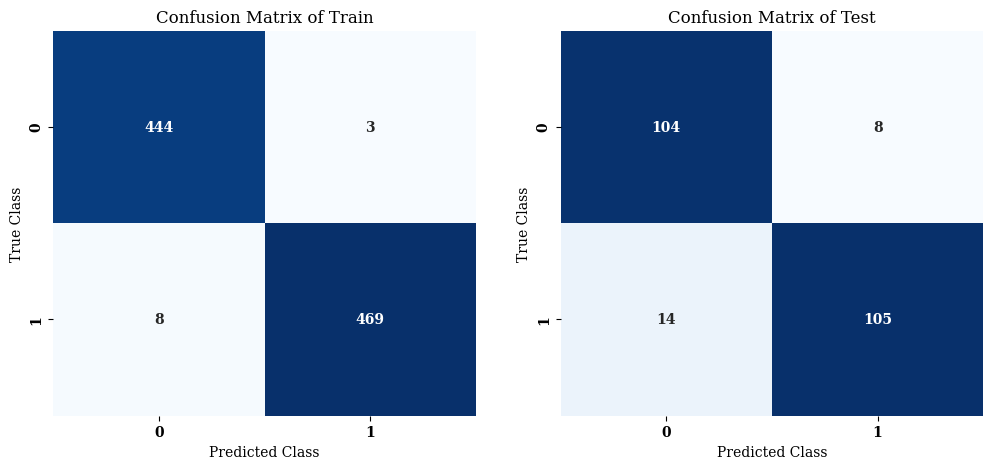

In [22]:
# 计算训练集和测试集的混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)

# 设置绘图的颜色风格
pall = sns.color_palette(['#73a2c6', '#f4777f'])
sns.set_palette(pall)

# 绘制混淆矩阵的热图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")
plt.savefig("./APfps/GBT-APfps/混淆矩阵_GBT.svg", dpi=300)
plt.show()

#### ROC曲线的绘制

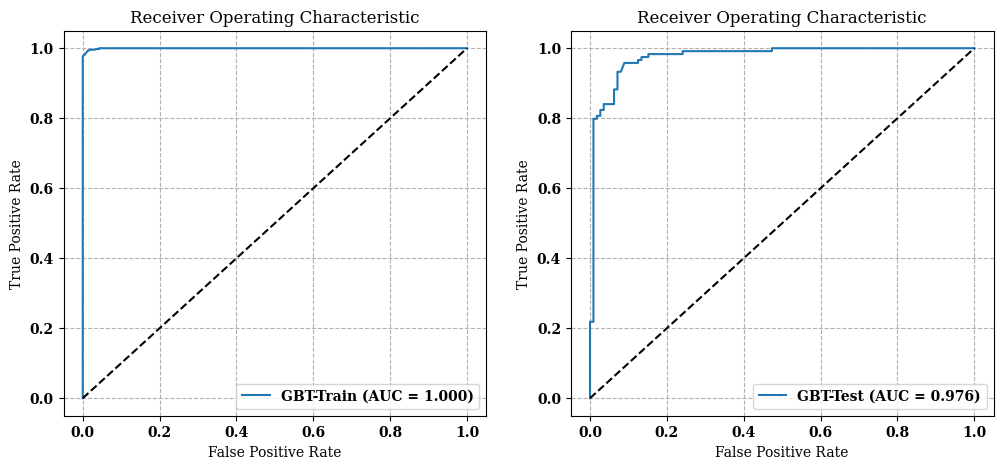

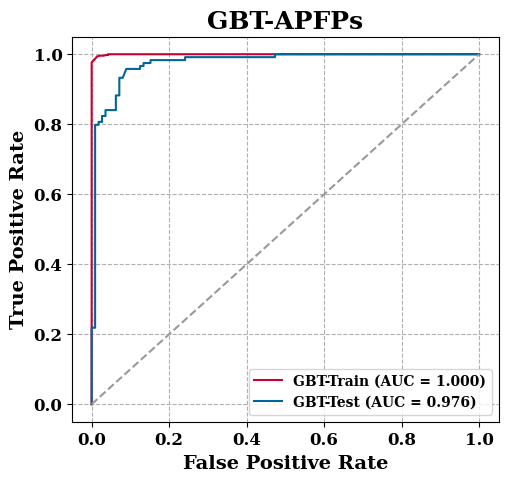

In [12]:
# 绘制训练集和测试集的ROC曲线

# 设置图形大小
plt.figure(figsize=(12, 5))

# 创建第一个子图，用于绘制训练集的ROC曲线
plt.subplot(1, 2, 1)
# 通过模型的predict_proba方法获取训练集上的预测概率，绘制训练集ROC图
y_pro_train = estimator.predict_proba(train_X)[:, 1]
# 计算训练集的真阳性率（TPR）和假阳性率（FPR）
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train)
# 计算AUC值
roc_auc_train = auc(fpr_train, tpr_train)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic') # 设置标题
plt.plot(fpr_train, tpr_train, label='GBT-Train (AUC = %0.3f)' % roc_auc_train) # 绘制ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 创建第二个子图，用于绘制测试集的ROC曲线
plt.subplot(1, 2, 2)
# 通过模型的predict_proba方法获取测试集上的预测概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 计算测试集的真阳性率（TPR）和假阳性率（FPR）
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)
# 计算AUC值
roc_auc_test = auc(fpr_test, tpr_test)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='GBT-Test (AUC = %0.3f)' % roc_auc_test) # 绘制ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/GBT-APfps/ROC_GBT.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='GBT-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='GBT-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('GBT-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/GBT-APfps/ROC_GBT_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### PR_AUC曲线的绘制

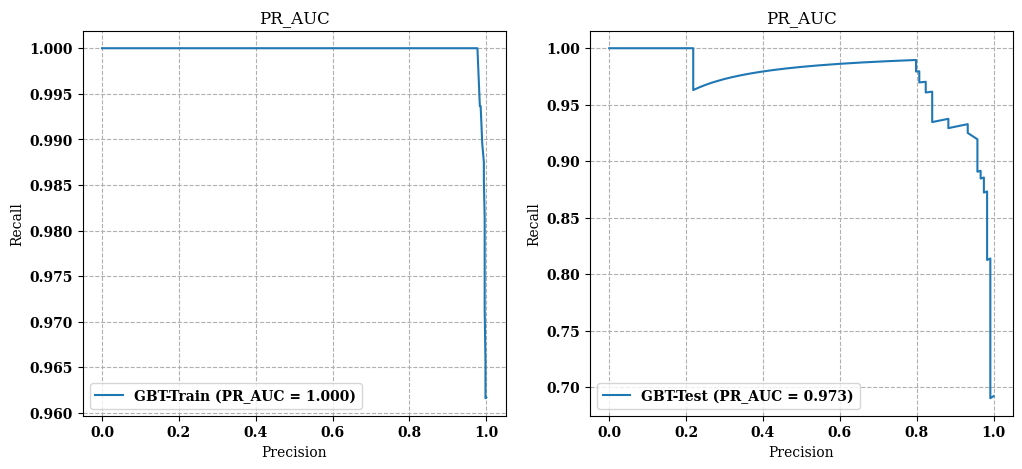

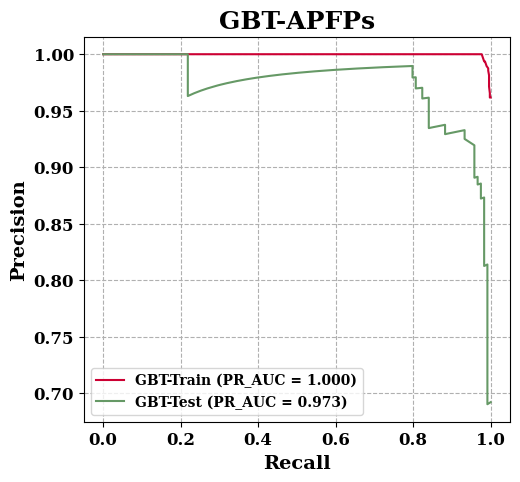

In [13]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

# 绘制PR_AUC曲线来评估模型在处理不平衡数据上的性能
# 设置绘图的大小
plt.figure(figsize=(12, 5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='GBT-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='GBT-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/GBT-APfps/PR_GBT.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='GBT-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='GBT-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('GBT-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/GBT-APfps/PR_GBT_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标的计算

In [25]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/GBT-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = GBT
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

### LogisticRegression参数搜索

In [ ]:
# 导入LogisticRegressionCV类，作为一个逻辑回归模型，使用交叉验证来选择正则化参数C的最佳值
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

# 定义函数进行模型优化
def LogisticRegressionCV_mdoel(X, Y):
    # 实例化LogisticRegressionCV模型，设置随机状态和并行作业数
    LogisticRegressionCV_auto = LogisticRegressionCV(random_state=0, n_jobs=-1)
    
    # 定义需要搜索的参数字典
    param_dict = {
        "solver": ['newton-cg', 'lbfgs', 'sag', 'saga'],  # 优化算法
        "penalty": ['l1', 'l2', 'elasticnet'], # 正则化：根据solver的不同，可用的penalty也不同
        "class_weight": ['none', 'balanced'],  # 类别权重
        "fit_intercept": [True, False],  # 是否计算截距
        "dual": [True, False],  # 是否使用对偶或原始方法
    }
    
    # 使用GridSearchCV进行参数搜索，cv是交叉验证策略，n_jobs=-1使用所有处理器并行工作
    estimator = GridSearchCV(estimator=LogisticRegressionCV_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring="roc_auc")
    estimator.fit(X, Y)  # 训练模型
    
    # 返回最佳参数组合、最佳得分以及训练好的最佳模型
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

# 调用函数并打印结果
tmp_1, tmp_2, LogisticRegressionCV_auto = LogisticRegressionCV_mdoel(X, Y)
print(tmp_1, tmp_2, LogisticRegressionCV_auto)

In [14]:
# 导入必要的库
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 准备数据
train_X = x_mor_train
train_Y = y_mor_train
test_X = x_mor_test
test_Y = y_mor_test

# 初始化和训练逻辑回归模型
LR = LogisticRegressionCV(random_state=0, n_jobs=-1,
                          solver='saga',
                          penalty='l1',
                          class_weight='balanced',
                          fit_intercept=False,
                          dual=False)

estimator = LR
estimator.fit(train_X, train_Y)

# 进行预测并评估模型
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)
# 打印训练集和测试集的准确率
print(f"训练集准确度是{accuracy_score(train_Y, clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y, clf_test)}")

训练集准确度是0.9891774891774892
测试集准确度是0.9090909090909091


#### 可视化混淆矩阵

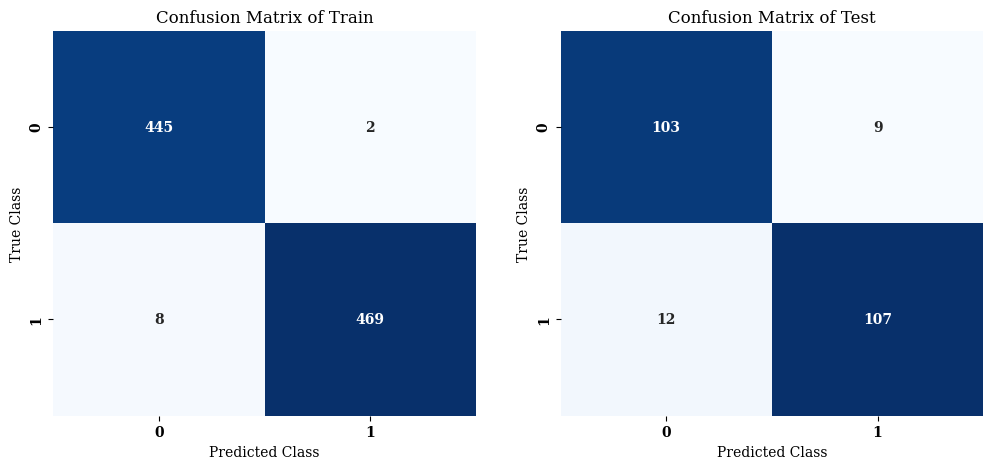

In [27]:
# 计算训练集和测试集的混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)

# 尝试修改一下颜色
pall = sns.color_palette(['#73a2c6', '#f4777f'])
sns.set_palette(pall)

# 绘制热图
plt.figure(figsize=(12, 5))
# 训练集混淆矩阵
plt.subplot(1, 2, 1) #创建了一个包含两个子图的图形，排列方式为一行两列
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

# 测试集混淆矩阵
plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")
plt.savefig("./APfps/LR-APfps/混淆矩阵_LR.svg", dpi=600)
plt.show()

#### 可视化ROC曲线

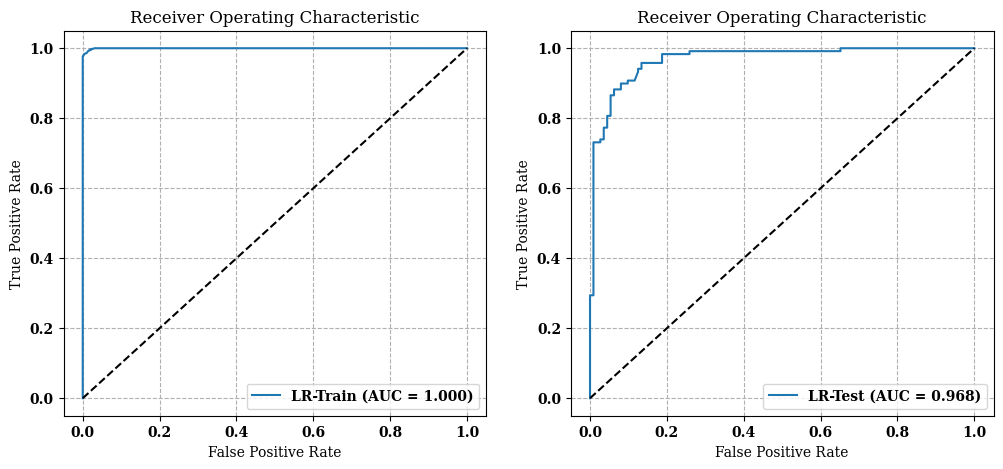

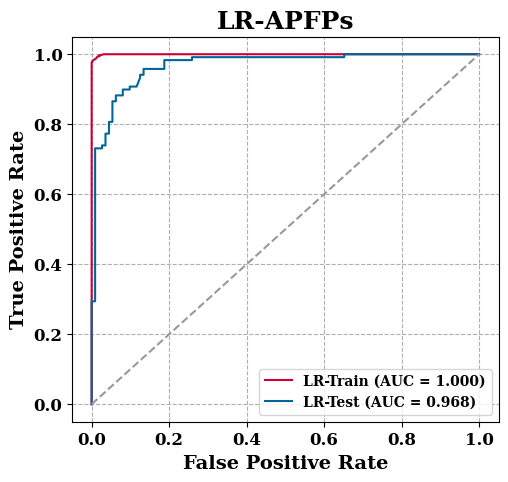

In [15]:
# 绘制训练集和测试集的ROC曲线
# 设置图形大小
plt.figure(figsize=(12, 5))

# 创建第一个子图，用于绘制训练集的ROC曲线
plt.subplot(1, 2, 1)
# 通过模型的predict_proba方法获取训练集上的预测概率，绘制训练集ROC图
y_pro_train = estimator.predict_proba(train_X)[:, 1]
# XXX
y_pre_train = estimator.predict(train_X)
# 计算训练集的真阳性率（TPR）和假阳性率（FPR）
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train)
# 计算AUC值
roc_auc_train = auc(fpr_train, tpr_train)  #也等于roc_auc_score(y_test,y_pro)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic') # 设置标题
plt.plot(fpr_train, tpr_train, label='LR-Train (AUC = %0.3f)' % roc_auc_train) # 绘制ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 创建第二个子图，用于绘制测试集的ROC曲线
plt.subplot(1, 2, 2)
# 通过模型的predict_proba方法获取测试集上的预测概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 获取预测
y_pre_test = estimator.predict(test_X)
# 计算测试集的真阳性率（TPR）和假阳性率（FPR）
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)
# 计算AUC值
roc_auc_test = auc(fpr_test, tpr_test)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='LR-Test (AUC = %0.3f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/LR-APfps/ROC_LR.svg", dpi = 600)
plt.show()


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='LR-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='LR-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('LR-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/LR-APfps/ROC_LR_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 可视化PR_AUC曲线

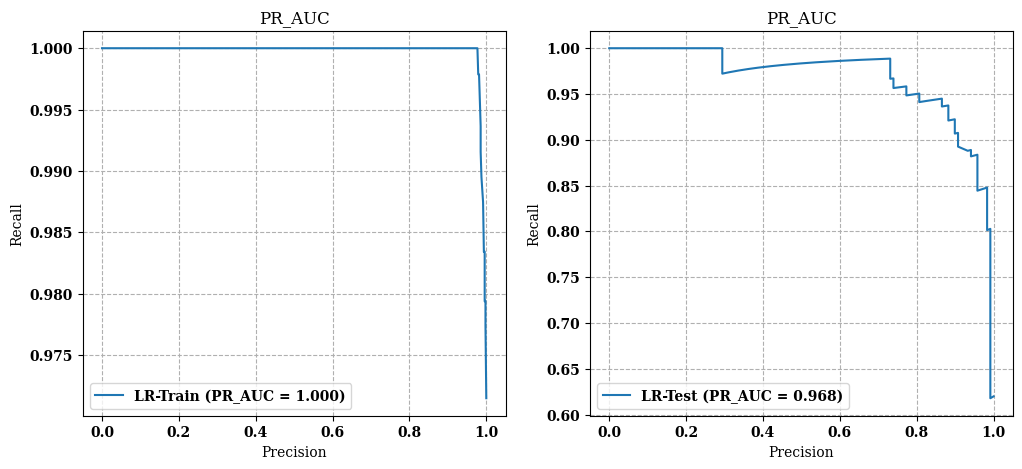

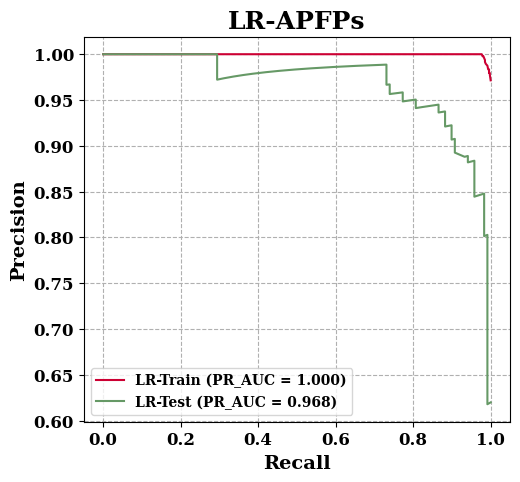

In [16]:
# 绘制PR_AUC曲线来评估模型在处理不平衡数据上的性能
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
import sklearn as sk
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

estimator.fit(train_X, train_Y)
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 设置绘图的大小
fig = plt.figure(figsize=(12,5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='LR-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='LR-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/LR-APfps/PR_LR.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='LR-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='LR-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('LR-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/LR-APfps/PR_LR_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标计算

In [30]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/LR-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = LR
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

### KNeighbors参数搜索

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 定义一个函数用于模型训练和参数优化
def KNeighborsClassifier_model(X,Y):   
    # 创建KNN分类器实例，指定单线程工作
    KNeighborsClassifier_auto = KNeighborsClassifier(n_jobs=1)
    # 定义要搜索的参数网格
    param_dict = {
        "n_neighbors": [2,3,4,5,6,7,8,9,10,11,12,13,14,15], # 邻居数
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'], # 计算最近邻的算法
        "weights": ['uniform', 'distance'], # 权重计算方式
        "p": [1, 2], # 距离度量的方式，1表示曼哈顿距离，2表示欧式距离
    }
    # 使用GridSearchCV进行参数网格搜索，cv=cv使用5折交叉验证，n_jobs=-1使用所有CPU核心，scoring="roc_auc"使用ROC曲线下的面积(AUC)作为评分标准
    estimator = GridSearchCV(estimator=KNeighborsClassifier_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring="roc_auc")
    # 拟合模型
    estimator.fit(X,Y)
    # 返回最佳参数组合、最佳分数以及最佳模型
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

# 对函数进行调用，传入特征集X和目标变量Y
tmp_1, tmp_2, KNeighborsClassifier_auto = KNeighborsClassifier_model(X,Y)
# 打印最佳参数、最佳分数和最佳模型
print(tmp_1, tmp_2, KNeighborsClassifier_auto)

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'} 0.9407021814836718 KNeighborsClassifier(algorithm='ball_tree', n_jobs=1, n_neighbors=6, p=1)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from time import time
begin_time = time()  # 开始计时

# 实例化KNN分类器，设置使用单一CPU执行
KNeighborsClassifier_auto = KNeighborsClassifier(n_jobs=1)

# 定义超参数搜索的范围
random_forest_hp_range = {
    "n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],  # 邻居数量的范围
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],  # 计算邻居的算法
    "weights": ['uniform', 'distance'],  # 权重函数
    "p": [1, 2],  # Minkowski距离的幂参数
}
print(random_forest_hp_range)

# 使用网格搜索找到最优超参数组合
estimator_all_roc = GridSearchCV(
    estimator=KNeighborsClassifier_auto,  # KNN分类器
    param_grid=random_forest_hp_range,  # 超参数范围
    cv=5,  # 交叉验证策略，原来是CV
    n_jobs=-1,  # 使用所有可用CPU
    scoring="roc_auc",  # 使用ROC_AUC评分
    verbose=1  # 显示搜索时的消息
)
estimator_all_roc.fit(X, Y)  # 训练模型

end_time = time()  # 结束计时
print(f"搜索耗时: {end_time - begin_time}秒")

# 打印最佳参数和对应的ROC AUC分数
print(estimator_all_roc.best_params_)
print(estimator_all_roc.best_score_)

# 提取搜索结果，并保存到DataFrame中
tmp = pd.DataFrame(estimator_all_roc.cv_results_)
df_fig = tmp[["mean_test_score", "params"]]
df_fig.to_csv("tmp2-knn.csv", index=False)  # 保存到CSV文件

# 为每个参数添加单独的列，并填充默认值
df_fig["n_neighbors"] = 1
df_fig['algorithm'] = 1
df_fig["weights"] = 1
df_fig['p'] = 1

# 遍历结果DataFrame，从params列中提取参数，并更新相应的列
for i in range(0, df_fig.shape[0]):
    dict_tmp = df_fig["params"].iloc[i]
    df_fig["n_neighbors"].iloc[i] = dict_tmp["n_neighbors"]
    df_fig["algorithm"].iloc[i] = dict_tmp["algorithm"]
    df_fig["weights"].iloc[i] = dict_tmp["weights"]
    df_fig['p'].iloc[i] = dict_tmp['p']
    
# 打印前50行结果并保存
df_fig.head(50)
#df_fig.to_csv("网格搜索结果KNN.csv", index=False)  # 将网格搜索结果保存为CSV文件
df_fig.describe()  # 给出结果的统计摘要

{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
Fitting 5 folds for each of 224 candidates, totalling 1120 fits
搜索耗时: 54.4588565826416秒
{'algorithm': 'kd_tree', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.9471195627176556


,mean_test_score,n_neighbors,p
count,224.000000,224.000000,224.00000
mean,0.933863,8.500000,1.50000
std,0.008035,4.040157,0.50112
min,0.914492,2.000000,1.00000
25%,0.928024,5.000000,1.00000
50%,0.935395,8.500000,1.50000
75%,0.940266,12.000000,2.00000
max,0.947120,15.000000,2.00000


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import warnings

warnings.filterwarnings("ignore")  # 忽略警告信息

# 加载训练和测试数据
train_X = x_mor_train
train_Y = y_mor_train
test_X = x_mor_test
test_Y = y_mor_test

# 实例化KNN分类器，配置超参数
KNN = KNeighborsClassifier(
    n_jobs=1,  # 使用所有可用CPU
    algorithm='kd_tree',  # 使用KD树算法查找最近邻
    n_neighbors=7,  # 最近邻数量
    p=1,  # 使用曼哈顿距离
    weights='uniform'  # 所有点权重相同
)

estimator = KNN
estimator.fit(train_X, train_Y)  # 训练模型

# 在训练集和测试集上进行预测
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 输出训练集和测试集的准确度
print(f"训练集准确度是{accuracy_score(train_Y, clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y, clf_test)}")

训练集准确度是0.9047619047619048
测试集准确度是0.8701298701298701


#### 混淆矩阵

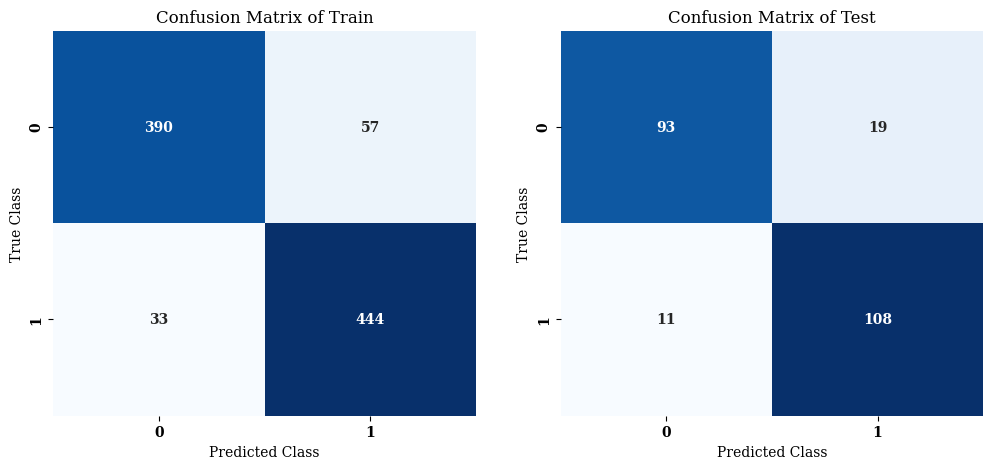

In [32]:
# 绘制混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)
pall = sns.color_palette(['#73a2c6', '#f4777f'])  # 设置颜色
sns.set_palette(pall)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")
plt.savefig("./APfps/KNN-APfps/混淆矩阵_KNN.svg", dpi=600)

#### ROC曲线绘制

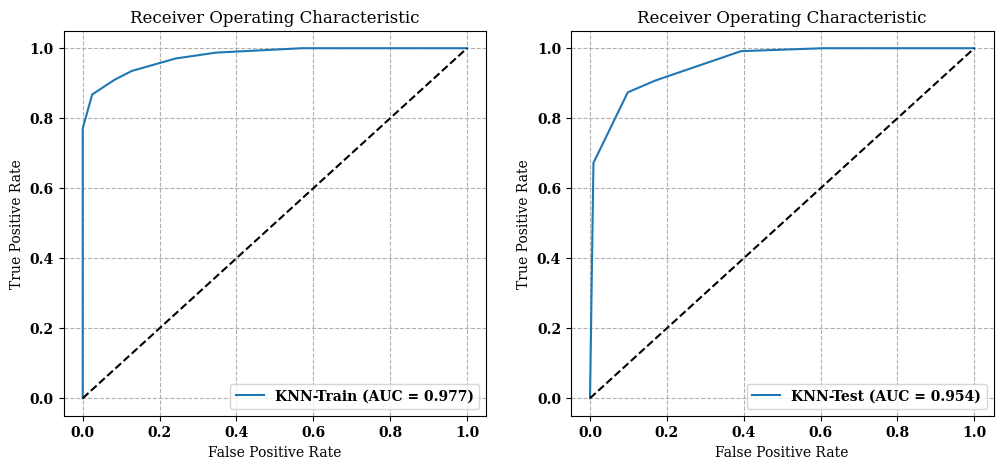

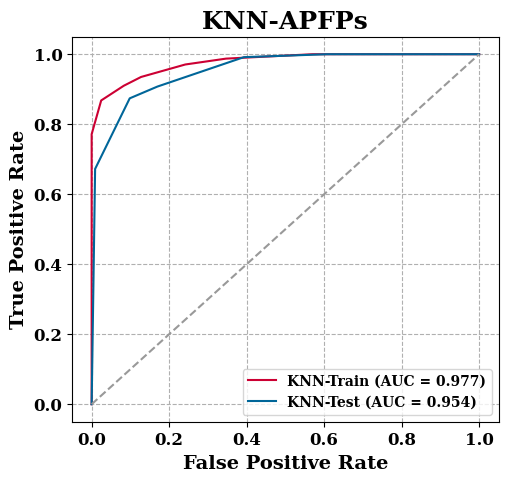

In [18]:
# 绘制训练集和测试集的ROC曲线
# 设置图形大小
plt.figure(figsize=(12, 5))

# 创建第一个子图，用于绘制训练集的ROC曲线
plt.subplot(1, 2, 1)
# 通过模型的predict_proba方法获取训练集上的预测概率，绘制训练集ROC图
y_pro_train = estimator.predict_proba(train_X)[:, 1]  # 计算概率
# 计算训练集的真阳性率（TPR）和假阳性率（FPR）
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train)
# 计算AUC值
roc_auc_train = auc(fpr_train, tpr_train)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')  # 设置标题
plt.plot(fpr_train, tpr_train, label='KNN-Train (AUC = %0.3f)' % roc_auc_train) # 绘制ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 创建第二个子图，用于绘制测试集的ROC曲线
plt.subplot(1, 2, 2)
# 通过模型的predict_proba方法获取测试集上的预测概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 计算测试集的真阳性率（TPR）和假阳性率（FPR）
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)
# 计算AUC值
roc_auc_test = auc(fpr_test, tpr_test)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='KNN-Test (AUC = %0.3f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/KNN-APfps/ROC_KNN.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='KNN-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='KNN-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('KNN-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/KNN-APfps/ROC_KNN_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### PR_AUC曲线的绘制

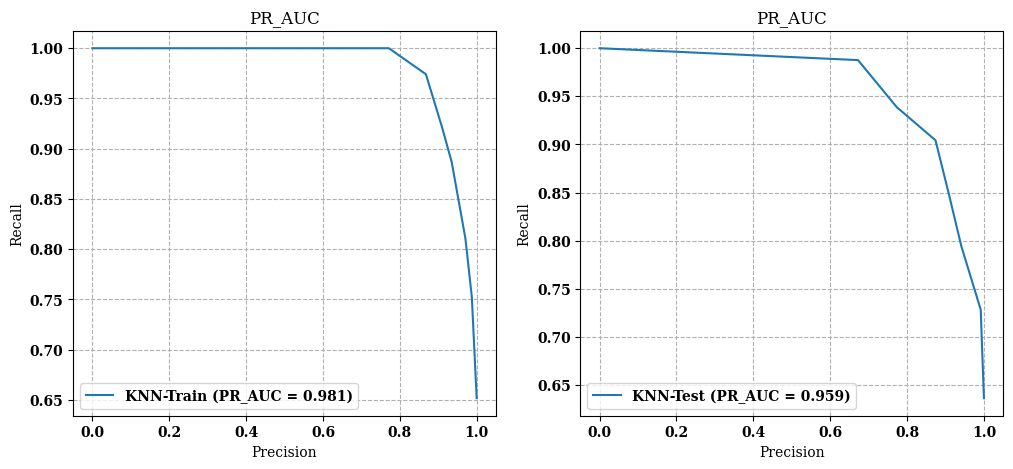

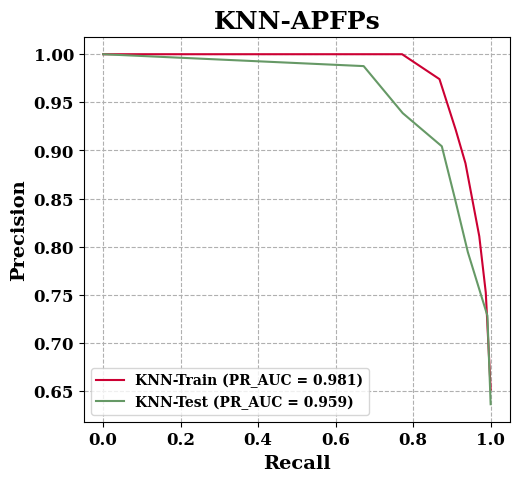

In [19]:
# 绘制PR（Precision-Recall）曲线
import matplotlib.pyplot as plt # 确保导入了matplotlib.pyplot
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import warnings
warnings.filterwarnings("ignore")

# 绘制PR_AUC曲线来评估模型在处理不平衡数据上的性能
# 设置绘图的大小
plt.figure(figsize=(12, 5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='KNN-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='KNN-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/KNN-APfps/PR_KNN.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='KNN-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='KNN-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('KNN-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例位置
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/KNN-APfps/PR_KNN_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标的计算

In [35]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/KNN-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = KNN
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

### SVM参数搜索

In [ ]:
from sklearn.svm import SVC
from time import time
# 记录开始时间
begin_time = time()
# 初始化SVC模型，设置随机状态以保证结果可重现，probability=True允许计算概率
SVC_auto = SVC(random_state=0, probability=True)

# 定义要测试的参数范围
random_forest_hp_range = {
    "gamma": ['0.1,0.2,0.3', 'auto'],  # 核函数参数
    'C': [0.1, 1, 10, 100],  # 正则化参数
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],  # 核函数类型
    "shrinking": [True, False],  # 是否使用收缩启发式
    "class_weight": ['none', 'balanced'],  # 类别权重
}
print(random_forest_hp_range)

# 使用GridSearchCV进行参数网格搜索
estimator_all_roc = GridSearchCV(estimator=SVC_auto,
                                 param_grid=random_forest_hp_range,
                                 cv=cv,  # 交叉验证策略
                                 n_jobs=-1,  # 使用所有处理器
                                 scoring="roc_auc",  # 使用ROC AUC分数作为评估标准
                                 verbose=1)
estimator_all_roc.fit(X, Y)  # 训练模型
end_time = time()
print({end_time - begin_time})  # 打印训练所用时间
print(estimator_all_roc.best_params_)  # 打印最佳参数组合
print(estimator_all_roc.best_score_)  # 打印最佳分数

# 将结果保存到DataFrame并输出到CSV文件
tmp = pd.DataFrame(estimator_all_roc.cv_results_)
df_fig = tmp[["mean_test_score", "params"]]
df_fig.to_csv("tmp2-svm.csv", index=False)
# 为结果DataFrame添加列，用于后续分析
df_fig["gamma"] = 1
df_fig["C"] = 1
df_fig['kernel'] = 1
df_fig["shrinking"] = 1
df_fig['class_weight'] = 1
# 遍历所有参数组合，提取具体参数值
for i in range(0, df_fig.shape[0]):
    dict_tmp = df_fig["params"].iloc[i]
    df_fig["gamma"].iloc[i] = dict_tmp["gamma"]
    df_fig["C"].iloc[i] = dict_tmp["C"]
    df_fig["kernel"].iloc[i] = dict_tmp["kernel"]
    df_fig["shrinking"].iloc[i] = dict_tmp["shrinking"]
    df_fig['class_weight'].iloc[i] = dict_tmp['class_weight']

# 输出前50个结果并保存整个DataFrame到CSV文件
df_fig.head(50)
df_fig.to_csv("网格搜索结果SVM.csv", index=False)
# 显示结果的描述性统计信息
df_fig.describe()

In [21]:
# 导入必要的库
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 设置数据集
train_X = x_mor_train  # 训练集特征
train_Y = y_mor_train  # 训练集标签
test_X = x_mor_test    # 测试集特征
test_Y = y_mor_test    # 测试集标签

# 初始化SVM模型并设置参数
SVM = SVC(random_state=0,        # 随机数种子
          class_weight='balanced',  # 类别权重平衡
          gamma='auto',             # 核函数的系数
          C=10,                     # 正则化参数
          kernel='rbf',         # 使用sigmoid核
          shrinking=False,           # 是否使用shrinking heuristic方法
          probability=True)         # 是否启用概率估计

# 训练模型
estimator = SVM
estimator.fit(train_X, train_Y)

# 在训练集和测试集上进行预测
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 计算并打印准确度
print(f"训练集准确度是{accuracy_score(train_Y, clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y, clf_test)}")

训练集准确度是0.9577922077922078
测试集准确度是0.9177489177489178


#### 绘制混淆矩阵

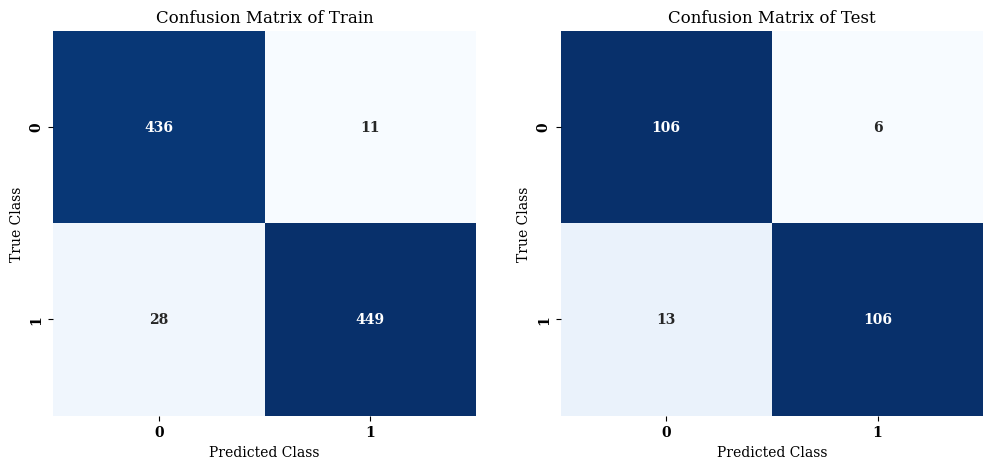

In [41]:
# 生成并绘制混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)

# 设置绘图风格
pall = sns.color_palette(['#73a2c6', '#f4777f'])
sns.set_palette(pall)

# 绘制训练集的混淆矩阵
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=False, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

# 绘制测试集的混淆矩阵
plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=False, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")

# 保存并显示图形
plt.savefig("./APfps/SVM-APfps/混淆矩阵_SVM.svg", dpi=600)
plt.show()

#### 绘制ROC曲线

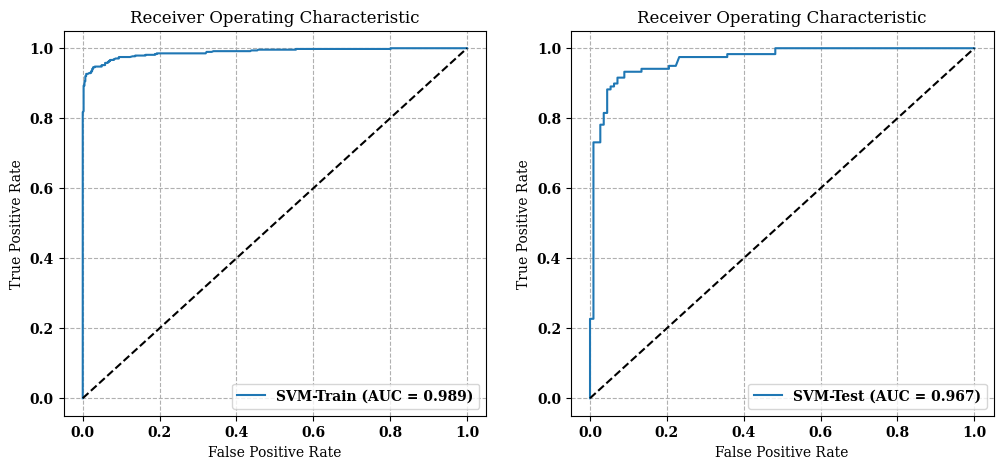

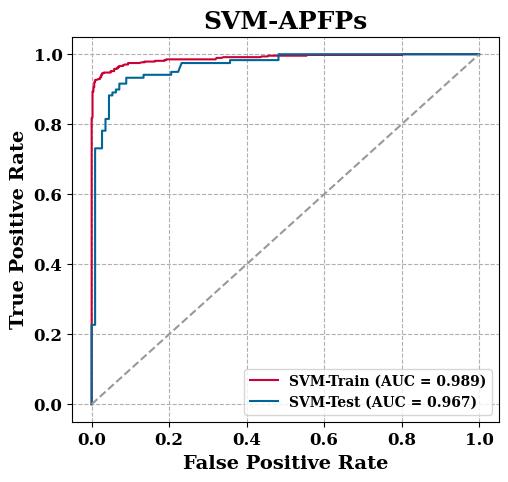

In [22]:
# 导入必要的库
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# 绘制ROC曲线的整体布局设置
plt.figure(figsize=(12, 5))

# 第一部分：绘制训练集的ROC曲线
plt.subplot(1, 2, 1) # 在一个1行2列的子图布局中选择第一个位置
y_pro_train = estimator.predict_proba(train_X)[:, 1] # 预测训练集的正类概率
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train) # 计算FPR和TPR
roc_auc_train = auc(fpr_train, tpr_train) # 计算曲线下面积AUC
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic') # 设置图表标题
plt.plot(fpr_train, tpr_train, label='SVM-Train (AUC = %0.3f)' % roc_auc_train) # 绘制ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 第二部分：绘制测试集的ROC曲线
plt.subplot(1, 2, 2)  # 在一个1行2列的子图布局中选择第二个位置
y_pro_test = estimator.predict_proba(test_X)[:, 1]  # 预测测试集的正类概率
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)  # 计算FPR和TPR
roc_auc_test = auc(fpr_test, tpr_test) # 计算曲线下面积AUC
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='SVM-Test (AUC = %0.3f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/SVM-APfps/ROC_SVM.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='SVM-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='SVM-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('SVM-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/SVM-APfps/ROC_SVM_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 绘制PR_AUC曲线

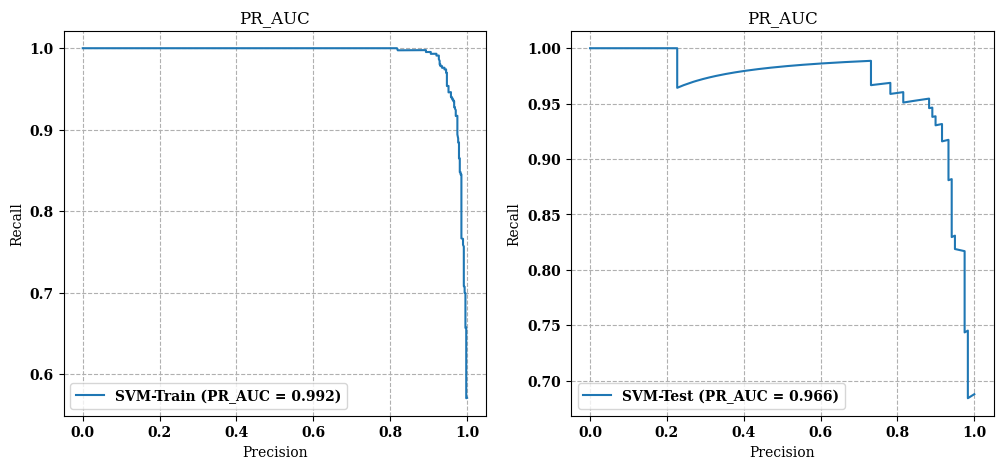

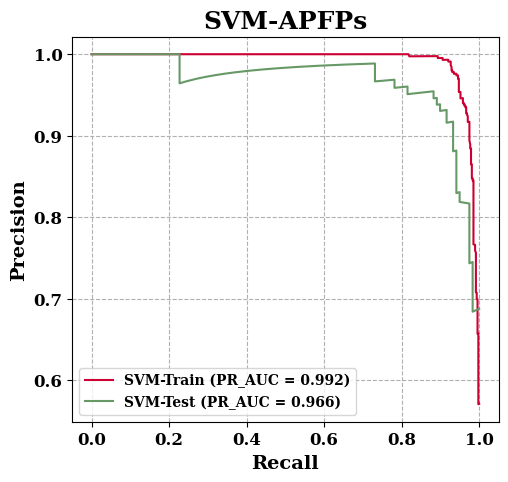

In [23]:
# 绘制PR（Precision-Recall）曲线
import matplotlib.pyplot as plt # 确保导入了matplotlib.pyplot
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import warnings
warnings.filterwarnings("ignore")

# 绘制PR_AUC曲线来评估模型在处理不平衡数据上的性能
# 设置绘图的大小
plt.figure(figsize=(12, 5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='SVM-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='SVM-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/SVM-APfps/PR_SVM.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='SVM-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='SVM-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('SVM-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/SVM-APfps/PR_SVM_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标计算

In [44]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/SVM-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = SVM
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

### RF参数搜索

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 实例化随机森林分类器，设置随机状态以确保结果可复现，n_jobs=-1允许并行处理，加速模型训练
RandomForestClassifier_auto = RandomForestClassifier(random_state=0, n_jobs=-1)

# 定义函数进行随机森林模型的参数优化
def RandomForestClassifier_model(X, Y):
    # 定义要搜索的参数字典
    param_dict = {
        "criterion": ['gini', 'entropy'],  # 指定分裂节点时的评价标准
        "max_features": ["log2", 'auto', 'sqrt'],  # 指定寻找最佳分割时考虑的特征数量
        "class_weight": ['balanced', 'none'],  # 类别权重，用于处理不平衡数据集
        "bootstrap": [True, False],  # 是否使用bootstrap抽样
        "oob_score": [True, False]  # 是否使用袋外样本来估计泛化精度
    }

    # 使用GridSearchCV进行参数搜索，cv指定交叉验证策略，n_jobs=-1使用所有CPU核心，scoring指定评分标准
    estimator = GridSearchCV(estimator=RandomForestClassifier_auto, param_grid=param_dict, cv=cv, n_jobs=-1, scoring="roc_auc")
    
    # 训练模型
    estimator.fit(X, Y)

    # 返回最佳参数组合、最佳得分以及训练好的最佳模型
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_

# 调用函数并打印结果
tmp_1, tmp_2, RandomForestClassifier_auto = RandomForestClassifier_model(X, Y)
print(tmp_1, tmp_2, RandomForestClassifier_auto)

In [38]:
print(tmp_1, tmp_2, RandomForestClassifier_auto)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'oob_score': True} 0.9570122379919838 RandomForestClassifier(class_weight='balanced', criterion='entropy', n_jobs=-1,
                       oob_score=True, random_state=0)


In [ ]:
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# 记录开始时间
begin_time = time()

# 定义随机森林的参数范围
n_estimators_range = [int(x) for x in np.linspace(start=10, stop=210, num=10)]  # 树的数量
max_depth_range = [int(x) for x in np.linspace(5, 25, num=10)]  # 树的最大深度
min_samples_split_range = [int(x) for x in np.linspace(5, 25, num=10)]  # 分裂内部节点所需的最小样本数
min_samples_leaf_range = [3, 4, 5, 6, 7]  # 叶节点所需的最小样本数

# 实例化随机森林分类器
RandomForestClassifier_auto = RandomForestClassifier(random_state=0, n_jobs=-1)

# 定义网格搜索的参数范围字典
random_forest_hp_range = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range,
    'min_samples_split': min_samples_split_range,
    'min_samples_leaf': min_samples_leaf_range,
    "criterion": ['entropy'],  # 信息增益度量标准
    "max_features": ['sqrt'],  # 寻找最佳分裂时考虑的最大特征数
    "class_weight": ['balanced'],  # 类别权重
    "bootstrap": [True],  # 是否采用bootstrap样本
    "oob_score": [True]  # 是否使用袋外样本来估计泛化精度
}

# 打印参数范围
print(random_forest_hp_range)

# 使用GridSearchCV进行参数搜索
estimator_all_roc = GridSearchCV(
    estimator=RandomForestClassifier_auto,
    param_grid=random_forest_hp_range,
    cv=cv,  # cv是之前定义的交叉验证策略
    n_jobs=-1,  # 使用所有CPU核心
    scoring="roc_auc",  # 评分标准为ROC AUC
    verbose=1  # 显示搜索过程
)

# 训练模型
estimator_all_roc.fit(X, Y)

# 记录结束时间并计算耗时
end_time = time()
print({end_time - begin_time})

# 打印最佳参数和最佳得分
print(estimator_all_roc.best_params_)
print(estimator_all_roc.best_score_)

# 将搜索结果保存为DataFrame并输出到CSV文件
tmp = pd.DataFrame(estimator_all_roc.cv_results_)
df_fig = tmp[["mean_test_score", "params"]]
df_fig.to_csv("tmp2.csv", index=False)

# 添加参数列到df_fig中，并从params字典中提取每个参数的值
df_fig["n_estimators"] = 1
df_fig['max_depth'] = 1
df_fig["min_samples_split"] = 1
df_fig['min_samples_leaf'] = 1
for i in range(df_fig.shape[0]):
    dict_tmp = df_fig["params"].iloc[i]
    df_fig["n_estimators"].iloc[i] = dict_tmp["n_estimators"]
    df_fig["max_depth"].iloc[i] = dict_tmp["max_depth"]
    df_fig["min_samples_split"].iloc[i] = dict_tmp["min_samples_split"]
    df_fig['min_samples_leaf'].iloc[i] = dict_tmp['min_samples_leaf']

# 输出前50行结果和描述性统计信息
df_fig.head(50)
df_fig.to_csv("网格搜索结果RF.csv", index=False)
df_fig.describe()

In [ ]:
# 记录结束时间并计算耗时
end_time = time()
print({end_time - begin_time})

# 打印最佳参数和最佳得分
print(estimator_all_roc.best_params_)
print(estimator_all_roc.best_score_)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 加载训练集和测试集
train_X = x_mor_train
train_Y = y_mor_train
test_X = x_mor_test
test_Y = y_mor_test

# 初始化随机森林分类器，并设置参数
RF = RandomForestClassifier(
    random_state=0,  # 设置随机种子，确保结果可重复
    class_weight='balanced',  # 类别权重，处理不平衡数据集
    criterion='entropy',  # 评价分裂质量的标准，这里使用基尼不纯度
    max_features='sqrt',  # 寻找最佳分裂时考虑的特征数，这里使用log2
    bootstrap=True,  # 是否使用bootstrap样本
    max_depth=11,  # 树的最大深度
    min_samples_leaf=3,  # 叶节点最少样本数
    min_samples_split=7,  # 分裂内部节点所需的最小样本数
    n_estimators=54,  # 构建的树的数量
    oob_score=True  # 是否使用袋外样本来评估精度
)

# 训练模型
estimator = RF
estimator.fit(train_X, train_Y)

# 在训练集和测试集上进行预测
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 打印训练集和测试集的准确度
print(f"训练集准确度是{accuracy_score(train_Y, clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y, clf_test)}")

训练集准确度是0.9567099567099567
测试集准确度是0.9177489177489178


#### 绘制混淆矩阵

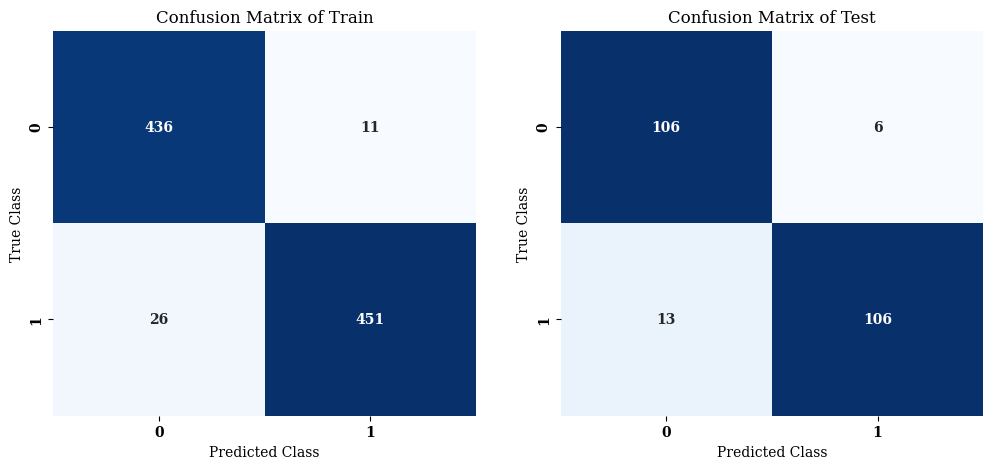

In [48]:
# 计算混淆矩阵并绘制
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)

# 设定绘图风格
pall = sns.color_palette(['#73a2c6', '#f4777f'])
sns.set_palette(pall)

# 绘制训练集的混淆矩阵
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

# 绘制测试集的混淆矩阵
plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")

# 保存混淆矩阵图像
plt.savefig("./APfps/RF-APfps/混淆矩阵_RF.svg", dpi=300)
plt.show()

#### 绘制ROC曲线

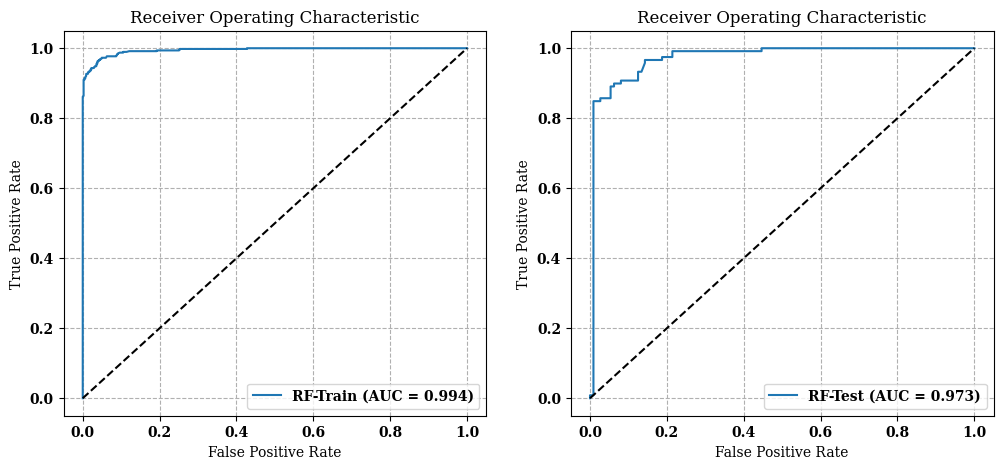

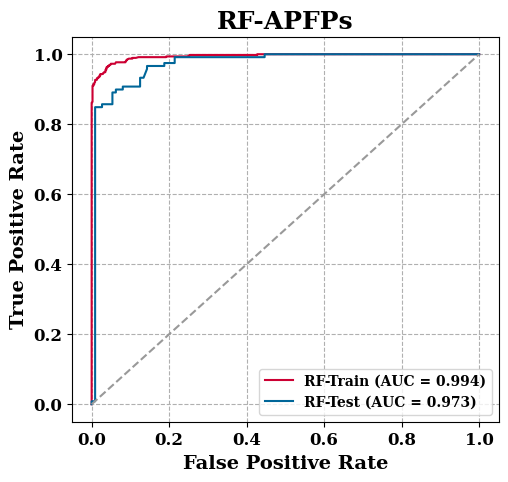

In [26]:
# 绘制训练集和测试集的ROC曲线
# 设置图形大小
plt.figure(figsize=(12, 5))

# 创建第一个子图，用于绘制训练集的ROC曲线
plt.subplot(1, 2, 1)
# 通过模型的predict_proba方法获取训练集上的预测概率，绘制训练集ROC图
y_pro_train = estimator.predict_proba(train_X)[:, 1]  # 计算概率
# 计算训练集的真阳性率（TPR）和假阳性率（FPR）
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train)
# 计算AUC值
roc_auc_train = auc(fpr_train, tpr_train)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')  # 设置标题
plt.plot(fpr_train, tpr_train, label='RF-Train (AUC = %0.3f)' % roc_auc_train) # 绘制ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 创建第二个子图，用于绘制测试集的ROC曲线
plt.subplot(1, 2, 2)
# 通过模型的predict_proba方法获取测试集上的预测概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 计算测试集的真阳性率（TPR）和假阳性率（FPR）
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)
# 计算AUC值
roc_auc_test = auc(fpr_test, tpr_test)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='RF-Test (AUC = %0.3f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/RF-APfps/ROC_RF.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='RF-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='RF-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('RF-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/RF-APfps/ROC_RF_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 绘制PR_AUC曲线

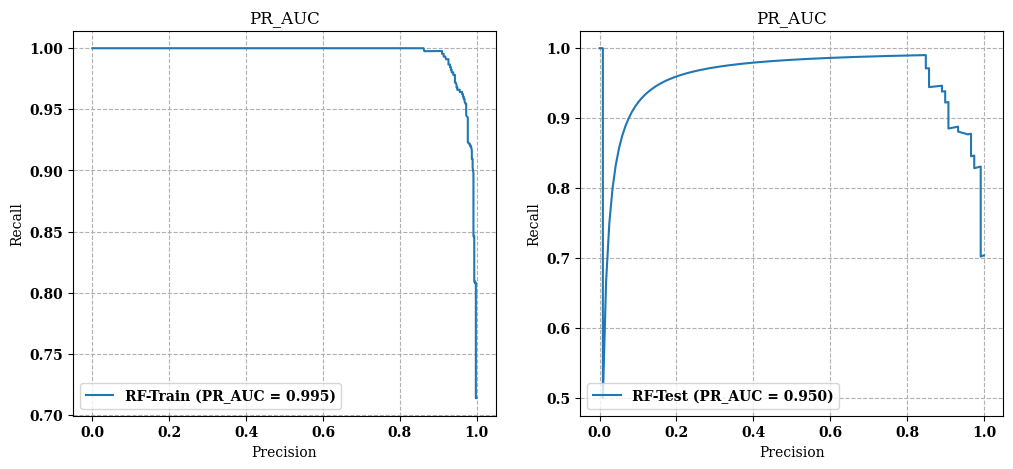

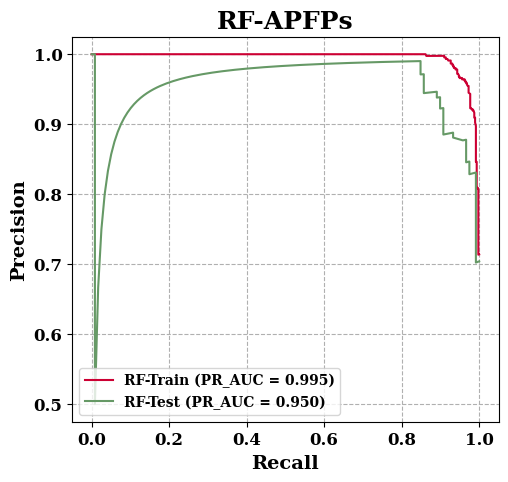

In [27]:
# 绘制PR（Precision-Recall）曲线
import matplotlib.pyplot as plt # 确保导入了matplotlib.pyplot
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import warnings
warnings.filterwarnings("ignore")

# 绘制PR_AUC曲线来评估模型在处理不平衡数据上的性能
# 设置绘图的大小
plt.figure(figsize=(12, 5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='RF-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='RF-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/RF-APfps/PR_RF.svg", dpi=600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='RF-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='RF-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('RF-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/RF-APfps/PR_RF_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标计算

In [51]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/RF-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = RF
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

### XGB参数搜索

In [14]:
# 导入XGBoost相关库
import xgboost as xgb
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier

# 初始化XGBoost分类器，设置随机状态保证结果可重复，指定为二元逻辑回归任务
xgb = XGBClassifier(
    random_state=0,
    objective='binary:logistic'
)

# 记录开始时间
from time import time
begin_time = time()

# 设置超参数的搜索范围
learning_rate_range = [0.1]  # 学习率
n_estimators_range = [int(x) for x in np.linspace(start=10, stop=200, num=20)]  # 基学习器数量，这里是20个等差数列值
max_depth_range = [int(x) for x in np.linspace(3, 23, num=10)]  # 树的最大深度
min_child_weight_range = [i for i in range(1, 6, 2)]  # 最小子节点权重
gamma_range = [i/10.0 for i in range(0, 5)]  # 分裂节点所需的最小损失函数下降值
subsample_range = [i/10.0 for i in range(6, 10)]  # 每棵树随机抽样的比例
colsample_bytree_range = [i/10.0 for i in range(6, 10)]  # 建立树时对特征随机抽样的比例
reg_alpha_range = [0.1]  # L1正则化系数
reg_lambda_range = [0.1]  # L2正则化系数

# 将这些参数范围组合成一个字典
random_forest_hp_range = {
    'n_estimators': n_estimators_range,
    'max_depth': max_depth_range,
    'min_child_weight': min_child_weight_range,
    'gamma': gamma_range,
    'subsample': subsample_range,
    'colsample_bytree': colsample_bytree_range,
    'reg_alpha': reg_alpha_range,
    'reg_lambda': reg_lambda_range
}

# 输出超参数搜索范围
print(random_forest_hp_range)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_depth': [3, 5, 7, 9, 11, 14, 16, 18, 20, 23], 'min_child_weight': [1, 3, 5], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9], 'reg_alpha': [0.1], 'reg_lambda': [0.1]}


In [15]:
# 使用GridSearchCV进行网格搜索，cv参数定义了交叉验证的策略，n_jobs=-1表示使用所有CPU核心
estimator_all_roc = GridSearchCV(estimator=xgb,
                                 param_grid=random_forest_hp_range,
                                 cv=cv,  # cv是交叉验证策略
                                 n_jobs=-1,  # 使用所有CPU核心
                                 scoring="roc_auc",  # 使用AUC作为评分标准
                                 verbose=1)  # 显示搜索过程
estimator_all_roc.fit(X, Y)  # 训练模型并寻找最佳的超参数组合

# 记录结束时间并打印总共耗费的时间
end_time = time()
print({end_time - begin_time})

# 输出找到的最佳参数组合和对应的AUC得分
print(estimator_all_roc.best_params_)
print(estimator_all_roc.best_score_)

# 将GridSearchCV的结果保存为DataFrame，并将其导出为CSV文件
tmp = pd.DataFrame(estimator_all_roc.cv_results_)
df_fig = tmp[["mean_test_score", "params"]]
df_fig.to_csv("xgbtmp.csv", index=False)
df_fig = pd.read_csv("xgbtmp.csv") # 读取刚才保存的CSV文件

# 为DataFrame中的每个参数创建列，并填充搜索过的参数值，为每个超参数创建一个新列，并初始化为1
df_fig["colsample_bytree"] = 1
df_fig["gamma"] = 1
df_fig["max_depth"] = 1
df_fig["min_child_weight"]=1
df_fig["n_estimators"]=1
df_fig["reg_alpha"]=1
df_fig["reg_lambda"]=1
df_fig["subsample"]=1
# 逐行更新DataFrame中的参数值， 遍历每一行，将字符串形式的参数字典转换为字典对象，并填充上述创建的列
for i in range(0, df_fig.shape[0]):
    dict_tmp = df_fig['params'].iloc[i]
    dict_tmp = eval(dict_tmp)  # 将字符串表示的字典转换为字典
    # 以此类推，为其他参数创建列并填充值...
    df_fig["colsample_bytree"].iloc[i] = dict_tmp["colsample_bytree"]
    df_fig["gamma"].iloc[i] = dict_tmp["gamma"]
    df_fig["max_depth"].iloc[i] = dict_tmp["max_depth"]
    df_fig["min_child_weight"].iloc[i] = dict_tmp["min_child_weight"]
    df_fig["n_estimators"].iloc[i] = dict_tmp["n_estimators"]
    df_fig["reg_alpha"].iloc[i] = dict_tmp["reg_alpha"]
    df_fig["reg_lambda"].iloc[i] = dict_tmp["reg_lambda"]
    df_fig["subsample"].iloc[i] = dict_tmp["subsample"]
    # 更新DataFrame中的参数值...       
df_fig.head(50)  # 显示前50行搜索结果
df_fig.to_csv("xgb网格搜索结果.csv", index=False)  # 保存网格搜索结果为CSV文件
df_fig.describe()  # 输出网格搜索结果的描述性统计信息

Fitting 5 folds for each of 48000 candidates, totalling 240000 fits
{39127.573990345}
{'colsample_bytree': 0.6, 'gamma': 0.4, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 60, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.9}
0.9717200867336881


,mean_test_score,colsample_bytree,gamma,max_depth,min_child_weight,n_estimators,reg_alpha,reg_lambda,subsample
count,48000.000000,48000.000000,48000.000000,48000.000000,48000.00000,48000.000000,4.800000e+04,4.800000e+04,48000.000000
mean,0.962171,0.750000,0.200000,12.600000,3.00000,105.000000,1.000000e-01,1.000000e-01,0.750000
std,0.004472,0.111805,0.141423,6.343567,1.63301,57.663414,1.387793e-17,1.387793e-17,0.111805
min,0.923736,0.600000,0.000000,3.000000,1.00000,10.000000,1.000000e-01,1.000000e-01,0.600000
25%,0.960364,0.675000,0.100000,7.000000,1.00000,57.500000,1.000000e-01,1.000000e-01,0.675000
50%,0.963193,0.750000,0.200000,12.500000,3.00000,105.000000,1.000000e-01,1.000000e-01,0.750000
75%,0.965082,0.825000,0.300000,18.000000,5.00000,152.500000,1.000000e-01,1.000000e-01,0.825000
max,0.971720,0.900000,0.400000,23.000000,5.00000,200.000000,1.000000e-01,1.000000e-01,0.900000


In [29]:
# 导入XGBoost的可视化工具和XGBClassifier分类器
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier

# 定义训练集和测试集
train_X = x_mor_train
train_Y = y_mor_train
test_X = x_mor_test
test_Y = y_mor_test

# 初始化XGBClassifier分类器，并设置超参数
xgb = XGBClassifier(
    random_state=0,  # 随机种子，保证可复现性
    objective='binary:logistic',  # 目标函数为二元逻辑回归
    colsample_bytree=0.6,  # 构造每棵树时列的采样率
    gamma=0.4,  # 叶子节点分裂所需的最小损失减少
    max_depth=5,  # 最大深度
    min_child_weight=5,  # 孩子节点所需的最小权重和
    n_estimators=60,  # 树的个数
    reg_alpha=0.1,  # L1正则化系数
    reg_lambda=0.1,  # L2正则化系数
    subsample=0.9  # 训练每棵树时样本的采样率
)

# 使用训练数据训练模型
estimator = xgb
estimator.fit(train_X, train_Y)

# 对训练集和测试集进行预测
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 打印训练集和测试集的准确度
print(f"训练集准确度是{accuracy_score(train_Y, clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y, clf_test)}")

训练集准确度是0.9848484848484849
测试集准确度是0.8917748917748918


#### 绘制混淆矩阵

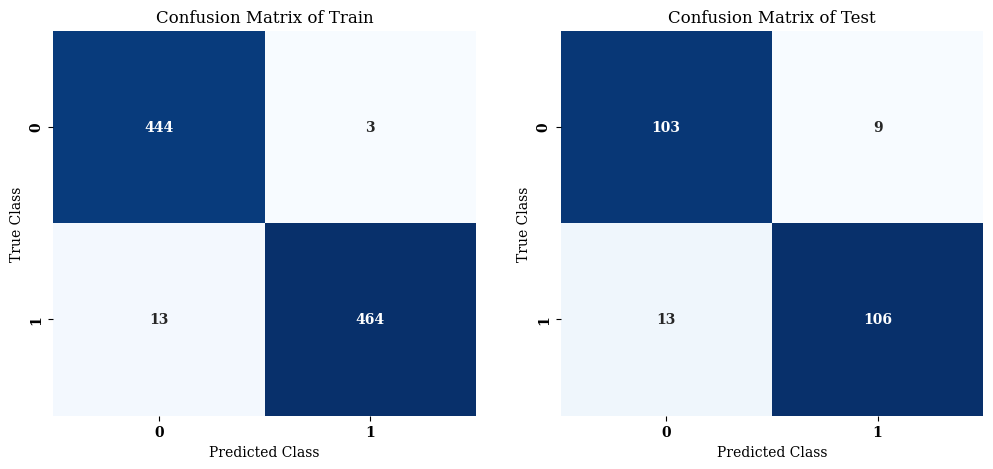

In [53]:
# 计算并打印混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)

# 修改配色方案
pall = sns.color_palette(['#73a2c6', '#f4777f'])
sns.set_palette(pall)

# 绘制训练集和测试集的混淆矩阵热图
plt.figure(figsize=(12, 5))

# 绘制训练集混淆矩阵热图
plt.subplot(1, 2, 1)
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")

# 绘制测试集混淆矩阵热图
plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=None, fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")

# 保存混淆矩阵图像
plt.savefig("./APfps/XGB-APfps/混淆矩阵_XGB.svg", dpi=300)

# 显示图像
plt.show()

#### 绘制ROC曲线

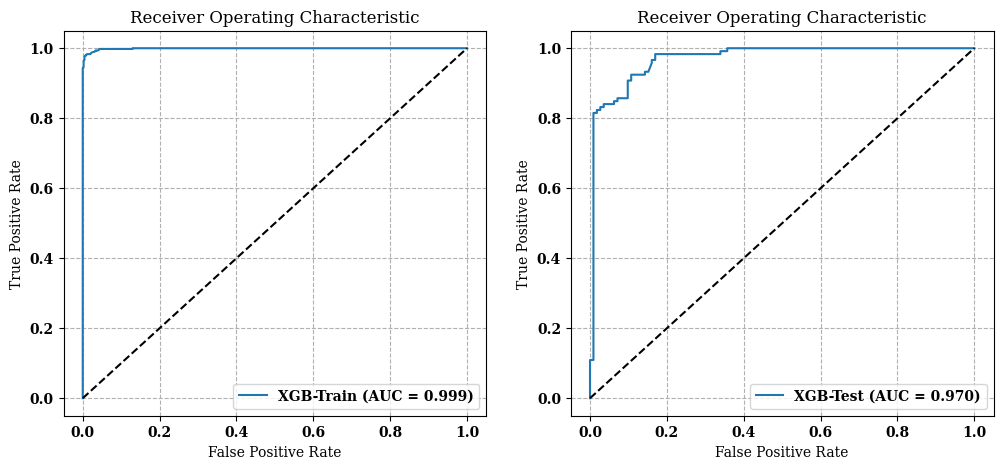

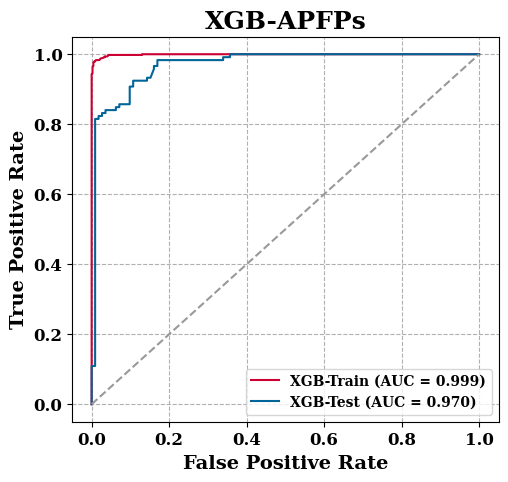

In [30]:
# 绘制ROC曲线，前面已经导入相关包
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# 设置图形大小
plt.figure(figsize=(12, 5))

# 创建第一个子图，用于绘制训练集的ROC曲线
plt.subplot(1, 2, 1)
# 通过模型的predict_proba方法获取训练集上的预测概率，绘制训练集ROC图
y_pro_train = estimator.predict_proba(train_X)[:, 1]
# 获取预测
y_pre_train = estimator.predict(train_X)
#计算训练集的真阳性率（TPR）和假阳性率（FPR）
fpr_train, tpr_train, thresholds = roc_curve(train_Y, y_pro_train)
# 计算AUC值
roc_auc_train = auc(fpr_train, tpr_train) # 也可以使用roc_auc_score(y_test, y_pro)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')  # 设置标题
plt.plot(fpr_train, tpr_train, label='XGB-Train (AUC = %0.3f)' % roc_auc_train) # 训练集ROC曲线
plt.plot([0, 1], [0, 1], '--',  color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 创建第二个子图，用于绘制测试集的ROC曲线
plt.subplot(1, 2, 2)
# 通过模型的predict_proba方法获取测试集上的预测概率
y_pro_test = estimator.predict_proba(test_X)[:, 1]
# 获取预测
y_pre_test = estimator.predict(test_X)
# 计算测试集的真阳性率（TPR）和假阳性率（FPR）
fpr_test, tpr_test, thresholds = roc_curve(test_Y, y_pro_test)
# 计算AUC值
roc_auc_test = auc(fpr_test, tpr_test)  #也可以使用roc_auc_score(y_test, y_pro)
# 绘制ROC曲线
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, label='XGB-Test (AUC = %0.3f)' % roc_auc_test) # 测试集ROC曲线
plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower right') # 设置图例位置
# 添加横纵坐标标题
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True) # 显示顶部边框
ax.spines['right'].set_visible(True) # 显示右侧边框

# 保存训练集和测试集的ROC曲线图
plt.savefig("./APfps/XGB-APfps/ROC_XGB.svg", dpi = 600)
plt.show()


# 绘制训练集和测试集的ROC组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='XGB-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='XGB-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('XGB-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的ROC组合图
plt.savefig("./APfps/XGB-APfps/ROC_XGB_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 绘制PR_AUC曲线

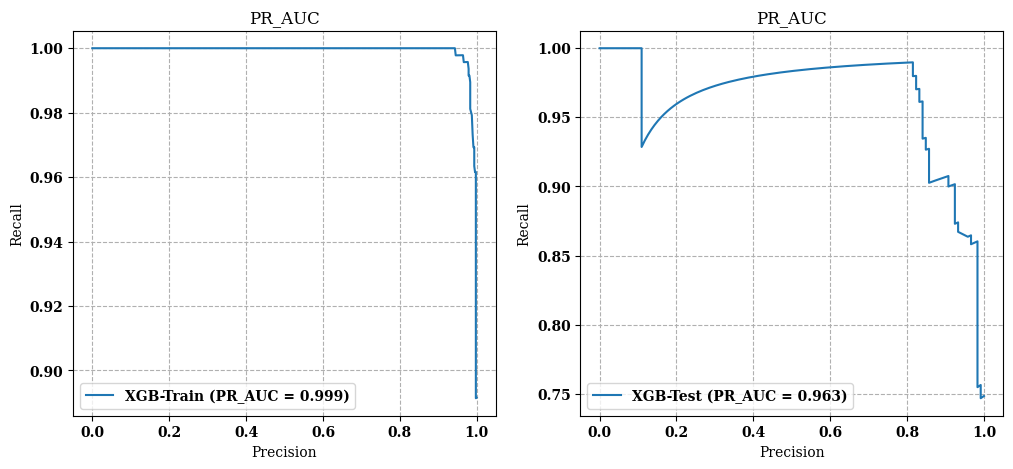

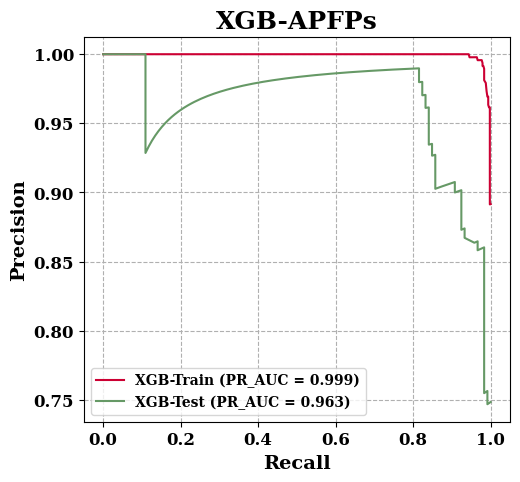

In [31]:
# 绘制PR（Precision-Recall）曲线
import matplotlib.pyplot as plt # 确保导入了matplotlib.pyplot
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score, auc
import warnings
warnings.filterwarnings("ignore")

estimator.fit(train_X, train_Y)
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)

# 设置绘图的大小
fig = plt.figure(figsize=(12,5))

# 训练集PR_AUC曲线
plt.subplot(1, 2, 1)
# 通过模型预测训练集上的概率
y_pro_train = estimator.predict_proba(train_X)[:, 1]
# 获取预测
y_pre_train = estimator.predict(train_X)
# 计算精确度和召回率
precision_train, recall_train, thresholds = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
average_precision_train = average_precision_score(train_Y, y_pro_train)
pr_auc_train = metrics.auc(recall_train, precision_train)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_train, precision_train, label='XGB-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left') # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 测试集PR_AUC曲线
plt.subplot(1, 2, 2)
# 通过模型预测测试集上的概率
y_pro_train = estimator.predict_proba(test_X)[:, 1]
# 获取预测
y_pre_train = estimator.predict(test_X)
# 计算精确度和召回率
precision_test, recall_test, thresholds = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
average_precision_test = average_precision_score(test_Y, y_pro_test)
pr_auc_test = metrics.auc(recall_test, precision_test)
# 绘制PR_AUC曲线
plt.title('PR_AUC')
plt.plot(recall_test, precision_test, label='XGB-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.grid(True, linestyle='--') # 添加背景网格
plt.legend(loc='lower left')  # 设置图例位置
# 添加横纵坐标标题
plt.ylabel('Recall')
plt.xlabel('Precision')
# 设置图形边框
ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

# 保存训练集和测试集的PR_AUCC曲线图
plt.savefig("./APfps/XGB-APfps/PR_XGB.svg", dpi = 600)
plt.show()


# 绘制训练集和测试集的PR_AUC组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='XGB-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='XGB-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
# plt.plot([0, 1], [0, 1], '--', color='black') # 绘制对角线
# 设置标题和标签
plt.title('XGB-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例位置
plt.legend(loc="lower left") # 设置图例位置
plt.grid(True, linestyle='--') # 添加背景网格
# 设置图形边框
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
# 保存训练集和测试集的PR_AUC组合图
plt.savefig("./APfps/XGB-APfps/PR_XGB_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评估与性能指标计算

In [56]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "./APfps/XGB-APfps/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = xgb
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

### DNN参数搜索

In [ ]:
from sklearn.neural_network import MLPClassifier
from time import time
begin_time = time()
# Search optimal hyperparameter
mlp_auto = MLPClassifier(random_state = 0)

#hidden_layer_sizes_range = [int(x) for x in np.linspace(start=25,stop=200,num=10)]

hidden_layer_sizes_range = [  
    (x, y, z)   
    for x in np.linspace(start=20, stop=200, num=5, dtype=int)   
    for y in np.linspace(start=20, stop=200, num=5, dtype=int)   
    for z in np.linspace(start=20, stop=200, num=5, dtype=int)  
] 

mlp_range = {"solver":['sgd','lbfgs','adam'],   # 优化算法的选择
                    "activation":['relu','identity','logistic','tanh'],   # 激活函数的选择
                    #"alpha": [1e-4],  #默认，正则化项参数
                    "hidden_layer_sizes" : hidden_layer_sizes_range,   # 隐藏层大小的选择
                    #"learning_rate_init" : [0.001], 
                    #默认0.001，初始学习率，控制更新权重的补偿，只有当solver=’sgd’ 或’adam’时使用
                    "learning_rate": ['constant','invscaling','adaptive'],   # 学习率的选择
                    }      
print(mlp_range)  

estimator_all_roc = GridSearchCV(estimator=mlp_auto,
                                 param_grid=mlp_range,
                                 cv=cv,
                                 n_jobs=-1,
                                 scoring="roc_auc",verbose=1)

# %%time
estimator_all_roc.fit(X, Y)
end_time = time()
print({end_time - begin_time})
print(estimator_all_roc.best_params_)
print(estimator_all_roc.best_score_)
tmp = pd.DataFrame(estimator_all_roc.cv_results_)
df_fig = tmp[["mean_test_score","params"]]
# df_fig.to_csv("./DNN/tmp2-dnn.csv",index=False)
# df_fig["solver"] = 1
# df_fig['activation'] = 1
# df_fig["hidden_layer_sizes"] = 1
# df_fig['learning_rate']=1
# for i in range(0,df_fig.shape[0]):
#     dict_tmp = df_fig["params"].iloc[i]
#     df_fig["solver"].iloc[i] = dict_tmp["solver"]
#     df_fig["activation"].iloc[i] = dict_tmp["activation"]
#     df_fig["hidden_layer_sizes"].iloc[i] = dict_tmp["hidden_layer_sizes"]
#     df_fig['learning_rate'].iloc[i]=dict_tmp['learning_rate'] 
# df_fig.head(50)
# df_fig.to_csv("./DNN/网格搜索结果DNN.csv",index=False)
# df_fig.describe()
#################################################################################
# 将最佳参数提取到新的列中  
for param in ["solver", "activation", "learning_rate"]:  
    df_fig[param] = df_fig["params"].apply(lambda x: x[param])  
# 由于hidden_layer_sizes是一个元组，我们需要将它转换为字符串以便保存  
df_fig["hidden_layer_sizes"] = df_fig["params"].apply(lambda x: str(x["hidden_layer_sizes"]))  
df_fig.to_csv("./DNN-APfps/tmp2-dnn.csv", index=False)  
df_fig.head(50)  
df_fig.to_csv("./DNN-APfps/网格搜索结果DNN.csv", index=False)  
df_fig.describe()

In [ ]:
print(estimator_all_roc.best_params_)

#### 混淆矩阵  AUC-ROC PR-AUC

训练集准确度是0.9880952380952381
测试集准确度是0.9090909090909091


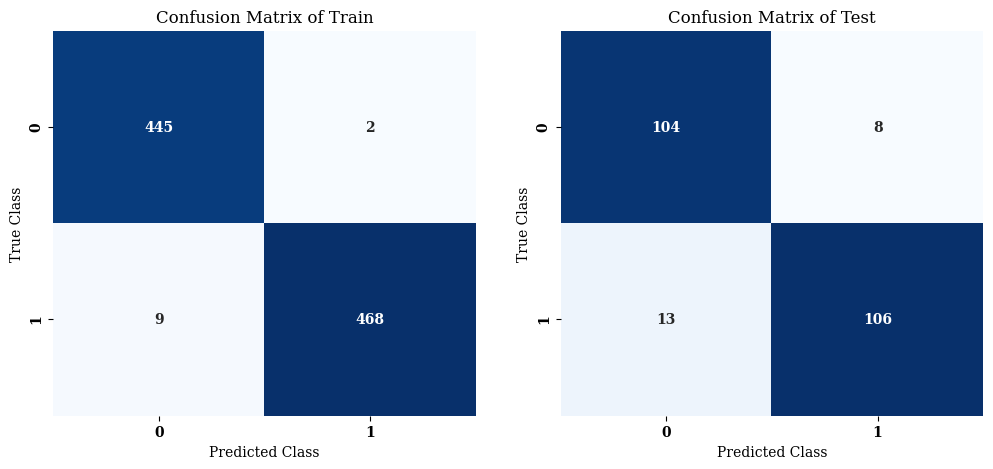

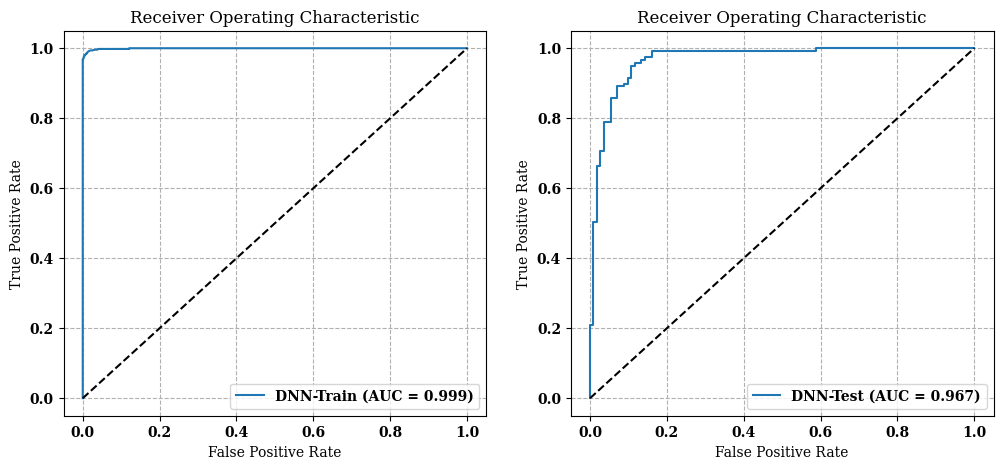

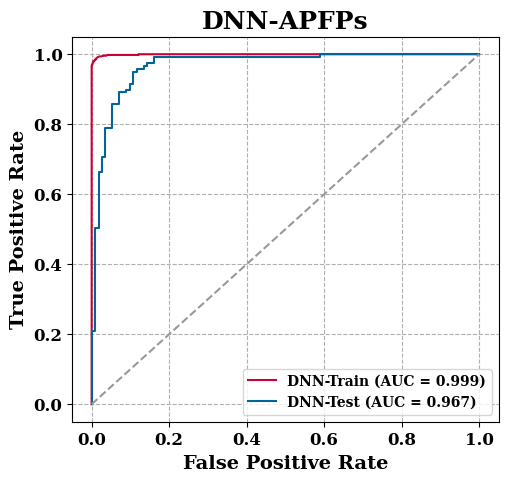

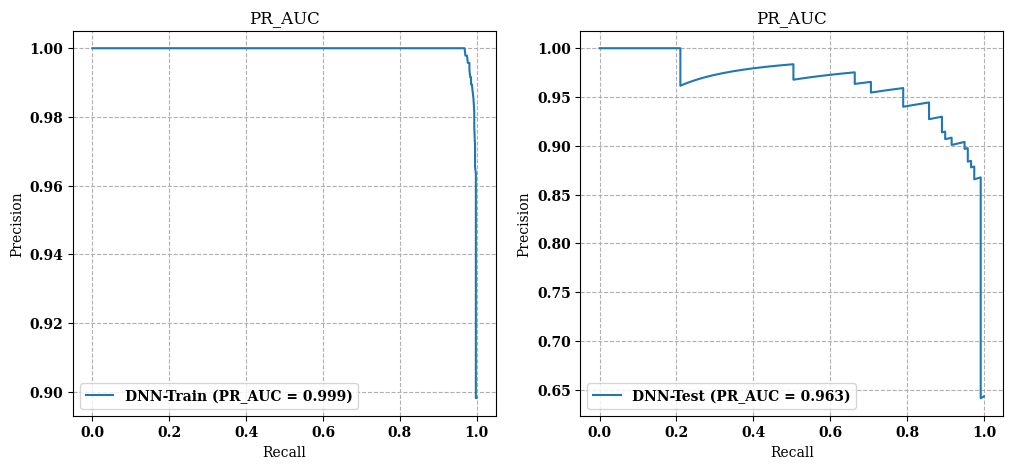

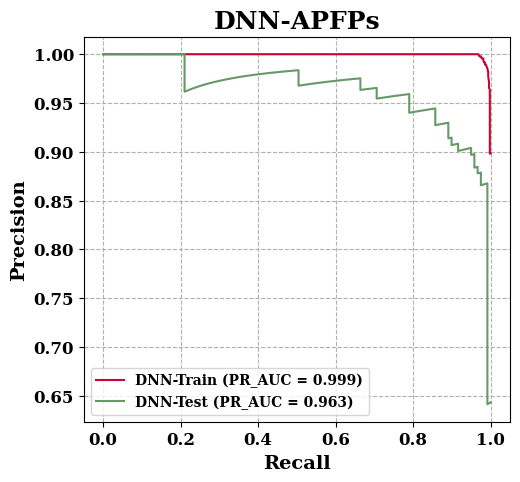

In [32]:
from sklearn.neural_network import MLPClassifier
train_X = x_mor_train  # 训练集特征数据
train_Y = y_mor_train  # 训练集目标数据（标签）
test_X = x_mor_test    # 测试集特征数据
test_Y = y_mor_test    # 测试集目标数据（标签）

mlp = MLPClassifier(
    random_state=0,
    activation='tanh',
    hidden_layer_sizes = (200, 155, 65),
    learning_rate = 'constant',
    solver = 'sgd'
)
# 训练模型
estimator = mlp
estimator.fit(train_X, train_Y)
# 在训练集和测试集上进行预测
clf_train = estimator.predict(train_X)
clf_test = estimator.predict(test_X)
print(f"训练集准确度是{accuracy_score(train_Y,clf_train)}")
print(f"测试集准确度是{accuracy_score(test_Y,clf_test)}")

# 生成训练集和测试集的混淆矩阵
train_matrix = confusion_matrix(train_Y, clf_train)
test_matrix = confusion_matrix(test_Y, clf_test)
# 绘制混淆矩阵
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_matrix, annot=True, cmap="Blues", cbar=None,fmt="d") 
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Train")
plt.subplot(1, 2, 2)
sns.heatmap(test_matrix, annot=True, cmap="Blues", cbar=None,fmt="d")
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.title("Confusion Matrix of Test")
plt.savefig("./APfps/DNN-APfps/混淆矩阵_DNN.svg", dpi = 600)
plt.show()

################################  ROC_AUC #########################################
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12, 5))
# 训练集 ROC 图
plt.subplot(1, 2, 1)
y_pro_train = estimator.predict_proba(train_X)[:, 1]  # 获取训练集的预测概率
fpr_train, tpr_train, _ = roc_curve(train_Y, y_pro_train)  # 计算 ROC 曲线的参数
roc_auc_train = auc(fpr_train, tpr_train)  # 计算 AUC
plt.plot(fpr_train, tpr_train, label='DNN-Train (AUC = %0.3f)' % roc_auc_train)  # 绘制 ROC 曲线
plt.plot([0, 1], [0, 1], '--', color='black')  #颜色  # 绘制对角线
plt.title('Receiver Operating Characteristic')  # 设置标题
plt.xlabel('False Positive Rate')  # 设置横坐标标签
plt.ylabel('True Positive Rate')  # 设置纵坐标标签
plt.legend(loc='lower right')  # 设置图例位置
plt.gca().spines['top'].set_visible(True)  # 显示顶部边框
plt.gca().spines['right'].set_visible(True)  # 显示右侧边框
# 添加背景网格
plt.grid(True, linestyle='--')
# 绘制测试集 ROC 图
plt.subplot(1, 2, 2)
y_pro_test = estimator.predict_proba(test_X)[:, 1]  # 获取测试集的预测概率
fpr_test, tpr_test, _ = roc_curve(test_Y, y_pro_test)  # 计算 ROC 曲线的参数
roc_auc_test = auc(fpr_test, tpr_test)  # 计算 AUC
plt.plot(fpr_test, tpr_test, label='DNN-Test (AUC = %0.3f)' % roc_auc_test)  # 绘制 ROC 曲线
plt.plot([0, 1], [0, 1], '--', color='black')  #颜色  # 绘制对角线
plt.title('Receiver Operating Characteristic')  # 设置标题
plt.xlabel('False Positive Rate')  # 设置横坐标标签
plt.ylabel('True Positive Rate')  # 设置纵坐标标签
plt.legend(loc='lower right')  # 设置图例位置
plt.gca().spines['top'].set_visible(True)  # 显示顶部边框
plt.gca().spines['right'].set_visible(True)  # 显示右侧边框
# 添加背景网格
plt.grid(True, linestyle='--')
plt.savefig("./APfps/DNN-APfps/AUC_ROC.svg", dpi=600)  # 保存图形为 SVG 格式文件
plt.show()  # 显示图形

#################################################################3绘制组合图
plt.figure(figsize=(5.5, 5))
# 绘制 ROC 曲线
plt.plot(fpr_train, tpr_train, color='#CC0033', label='DNN-Train (AUC = %0.3f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='#006699', label='DNN-Test (AUC = %0.3f)' % roc_auc_test)
# 绘制对角线
plt.plot([0, 1], [0, 1], '--', color='#999999')  #颜色
# 添加背景网格
plt.grid(True, linestyle='--')
# 设置标题和标签
plt.title('DNN-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例
plt.legend(loc='lower right')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.savefig("./APfps/DNN-APfps/AUC_ROC_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

################################  PR_AUC #########################################
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt
# 训练集PR_AUC图
plt.figure(figsize=(12, 5))
y_pro_train = estimator.predict_proba(train_X)[:, 1]
precision_train, recall_train, _ = precision_recall_curve(train_Y, y_pro_train, pos_label=1)
pr_auc_train = auc(recall_train, precision_train)
plt.subplot(1, 2, 1)
plt.plot(recall_train, precision_train, label='DNN-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
plt.title('PR_AUC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

# 测试集PR_AUC图
y_pro_test = estimator.predict_proba(test_X)[:, 1]
precision_test, recall_test, _ = precision_recall_curve(test_Y, y_pro_test, pos_label=1)
pr_auc_test = auc(recall_test, precision_test)
plt.subplot(1, 2, 2)
plt.plot(recall_test, precision_test, label='DNN-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.title('PR_AUC')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.savefig("./APfps/DNN-APfps/PR_AUC.svg", dpi=600)
plt.show()

#################################################################3绘制组合图
plt.figure(figsize=(5.5, 5))
# 绘制训练集PR_AUC图
plt.plot(recall_train, precision_train, color='#CC0033', label='DNN-Train (PR_AUC = {:.3f})'.format(pr_auc_train))
# 绘制测试集PR_AUC图
plt.plot(recall_test, precision_test, color='#669966', label='DNN-Test (PR_AUC = {:.3f})'.format(pr_auc_test))
plt.title('DNN-APFPs', fontsize=18, fontweight='bold')
plt.xlabel('Recall', fontsize=14, fontweight='bold')
plt.ylabel('Precision', fontsize=14, fontweight='bold')
# 设置横纵坐标轴的字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置图例位置
plt.legend(loc="lower left")
plt.grid(True, linestyle='--')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.savefig("./APfps/DNN-APfps/PR_AUC_组合.svg", dpi=600, bbox_inches='tight')
plt.show()

#### 模型评价

In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_auc_score, f1_score, matthews_corrcoef,
    confusion_matrix, average_precision_score
)

# Check if the directory exists, if not, create it
output_dir = "DNN-APfps"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function to calculate specificity
def specificity_score(y_true, y_pred):
    matrix = confusion_matrix(y_true, y_pred)
    TN = matrix[0, 0]
    FP = matrix[0, 1]
    return TN / (TN + FP) if (TN + FP) > 0 else 0

# Train model
estimator = mlp
estimator.fit(train_X, train_Y)

# Calculate metrics for the test set
clf_test = estimator.predict(test_X)
metrics = {
    "Accuracy": accuracy_score(test_Y, clf_test),
    "ROC AUC": roc_auc_score(test_Y, clf_test),
    "Precision": precision_score(test_Y, clf_test),
    "Recall": recall_score(test_Y, clf_test),
    "F1 Score": f1_score(test_Y, clf_test),
    "MCC": matthews_corrcoef(test_Y, clf_test),
    "AP": average_precision_score(test_Y, clf_test),
    "Specificity": specificity_score(test_Y, clf_test)
}

# Save metrics for test set
for name, value in metrics.items():
    df = pd.DataFrame([[value]], columns=["Test"])
    df.to_csv(os.path.join(output_dir, f"test_{name}.csv"))

# Calculate metrics for the training set
clf_train = estimator.predict(train_X)
metrics_train = {
    "Accuracy": accuracy_score(train_Y, clf_train),
    "ROC AUC": roc_auc_score(train_Y, clf_train),
    "Precision": precision_score(train_Y, clf_train),
    "Recall": recall_score(train_Y, clf_train),
    "F1 Score": f1_score(train_Y, clf_train),
    "MCC": matthews_corrcoef(train_Y, clf_train),
    "AP": average_precision_score(train_Y, clf_train),
    "Specificity": specificity_score(train_Y, clf_train)
}

# Save metrics for training set
for name, value in metrics_train.items():
    df = pd.DataFrame([[value]], columns=["Train"])
    df.to_csv(os.path.join(output_dir, f"train_{name}.csv"))

/home/md04/anaconda3/envs/fbw/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
